# Importacion de modulos

In [2]:
import pandas as pd
import numpy as np

import scipy.stats as stats
import statsmodels.api as sm
import pingouin as pg

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff

In [3]:
# Configuración de estilos para matplotlib y seaborn
# plt.style.use('seaborn-whitegrid')  # Cambiado de 'seaborn' a 'seaborn-whitegrid'
plt.style.use('ggplot')  # Usa el estilo 'ggplot' que es similar al de seaborn
sns.set_theme(style="whitegrid")  # Configuración de tema para seaborn
sns.set_palette("deep")

# Importacion de datos

In [8]:
df = pd.read_excel("bd.xlsx")
df.head(5)

,Id,No de ficha,Fecha de ingreso,Institucion,ARS,Historia clinica,Tipo de Documento,Numero de Documento,Ciudad,Departamento,...,Tipo de muestra 2,Fecha toma de la muestra 2,Fecha resultado muestra 2,Resultado toma de muestra 2,Contador,muestra rechazada,Fecha toma rechazada,Tipo de Vinculacion,Resultado Rechazada,Fecha resultado rechazada
0,365048,369980,2019-05-06,VICTORIA,MEDIMAS,1023943178,1.0,1023943178,Bogota,Cundinamarca,...,NaN,NaT,NaT,0.0,1.0,False,NaT,NaN,NaN,NaT
1,365049,369981,2019-05-06,VICTORIA,CAPITAL SALUD,1006844618,2.0,1006844618,Bogota,Cundinamarca,...,NaN,NaT,NaT,0.0,1.0,False,NaT,NaN,NaN,NaT
2,365050,369982,2019-05-06,VICTORIA,CAPITAL SALUD,1010045133,1.0,1010045133,Bogota,Cundinamarca,...,NaN,NaT,NaT,0.0,1.0,False,NaT,NaN,NaN,NaT
3,365051,369983,2019-05-06,VICTORIA,CAPITAL SALUD,1023936117,1.0,1023936117,Bogota,Cundinamarca,...,NaN,NaT,NaT,0.0,1.0,False,NaT,NaN,NaN,NaT
4,365052,369984,2019-05-07,VICTORIA,VINCULADO,VEN003927,4.0,VEN003927,Bogota,Cundinamarca,...,NaN,NaT,NaT,0.0,1.0,False,NaT,NaN,NaN,NaT


# Preparacion de los datos

## Renombrar

In [9]:
# Diccionario con los nombres nuevos
nuevos_nombres = {
    "Id": "id",
    "No de ficha": "ficha_id",
    "Fecha de ingreso": "fecha_ingreso",
    "Institucion": "institucion",
    "ARS": "ars",
    "Historia clinica": "historia_clinica",
    "Tipo de Documento": "tipo_documento",
    "Numero de Documento": "numero_documento",
    "Ciudad": "ciudad",
    "Departamento": "departamento",
    "Telefono uno": "telefono_1",
    "Telefono dos": "telefono_2",
    "Direccion": "direccion",
    "Primer Apellido": "apellido_1",
    "Segundo Apellido": "apellido_2",
    "Nombre Hijo de": "nombre_hijo",
    "Fecha de Nacimiento": "fecha_nacimiento",
    "Peso": "peso",
    "Sexo": "sexo",
    "Prematuro": "prematuro",
    "Transfundido": "transfundido",
    "Informacion completa": "informacion_completa",
    "Muestra adecuada": "muestra_adecuada",
    "Destino muestra": "destino_muestra",
    "Tipo de muestra": "tipo_muestra",
    "Fecha toma de la muestra": "fecha_toma_muestra",
    "Fecha de resultado": "fecha_resultado",
    "Resultados TSH neonatal": "tsh_neonatal",
    "No de ficha dos": "ficha_id_2",
    "Tipo de muestra 2": "tipo_muestra_2",
    "Fecha toma de la muestra 2": "fecha_toma_muestra_2",
    "Fecha resultado muestra 2": "fecha_resultado_muestra_2",
    "Resultado toma de muestra 2": "resultado_muestra_2",
    "Contador": "contador",
    "muestra rechazada": "muestra_rechazada",
    "Fecha toma rechazada": "fecha_toma_rechazada",
    "Tipo de Vinculacion": "tipo_vinculacion",
    "Resultado Rechazada": "resultado_rechazada",
    "Fecha resultado rechazada": "fecha_resultado_rechazada"
}

# Renombrar las columnas
df.rename(columns=nuevos_nombres, inplace=True)

# Verificar el resultado
print(df.columns)

Index(['id', 'ficha_id', 'fecha_ingreso', 'institucion', 'ars',
       'historia_clinica', 'tipo_documento', 'numero_documento', 'ciudad',
       'departamento', 'telefono_1', 'telefono_2', 'direccion', 'apellido_1',
       'apellido_2', 'nombre_hijo', 'fecha_nacimiento', 'peso', 'sexo',
       'prematuro', 'transfundido', 'informacion_completa', 'muestra_adecuada',
       'destino_muestra', 'tipo_muestra', 'fecha_toma_muestra',
       'fecha_resultado', 'tsh_neonatal', 'ficha_id_2', 'tipo_muestra_2',
       'fecha_toma_muestra_2', 'fecha_resultado_muestra_2',
       'resultado_muestra_2', 'contador', 'muestra_rechazada',
       'fecha_toma_rechazada', 'tipo_vinculacion', 'resultado_rechazada',
       'fecha_resultado_rechazada'],
      dtype='object')


## Eliminar datos personales

In [10]:
# Lista de columnas a eliminar (datos personales)
'''
columnas_a_eliminar = [
    "telefono_1",           # Telefono uno
    "telefono_2",           # Telefono dos
    "direccion",            # Direccion
    "apellido_1",           # Primer Apellido
    "apellido_2",           # Segundo Apellido
    "nombre_hijo",       # Nombre Hijo de
]

# Eliminar las columnas
df.drop(columns=columnas_a_eliminar, inplace=True)

# Verificar el resultado
print(df.columns)
'''

'\ncolumnas_a_eliminar = [\n    "telefono_1",           # Telefono uno\n    "telefono_2",           # Telefono dos\n    "direccion",            # Direccion\n    "apellido_1",           # Primer Apellido\n    "apellido_2",           # Segundo Apellido\n    "nombre_hijo",       # Nombre Hijo de\n]\n\n# Eliminar las columnas\ndf.drop(columns=columnas_a_eliminar, inplace=True)\n\n# Verificar el resultado\nprint(df.columns)\n'

## Corregir tipo de dato

In [11]:
# Convertir tipo_documento de float a int
df["tipo_documento"] = df["tipo_documento"].fillna(0).astype(int)

# Convertir fechas de object a datetime
df["fecha_nacimiento"] = pd.to_datetime(df["fecha_nacimiento"], errors="coerce")
df["fecha_toma_muestra"] = pd.to_datetime(df["fecha_toma_muestra"], errors="coerce")

df["telefono_1"] = df["telefono_1"].fillna(0)
df["telefono_1"] = df["telefono_1"].astype(int)
df["telefono_2"] = df["telefono_2"].fillna(0)
df["telefono_2"] = df["telefono_2"].astype(int)


In [12]:
df.dtypes

id                                    int64
ficha_id                              int64
fecha_ingreso                datetime64[ns]
institucion                          object
ars                                  object
historia_clinica                     object
tipo_documento                        int64
numero_documento                     object
ciudad                               object
departamento                         object
telefono_1                            int64
telefono_2                            int64
direccion                            object
apellido_1                           object
apellido_2                           object
nombre_hijo                          object
fecha_nacimiento             datetime64[ns]
peso                                float64
sexo                                 object
prematuro                              bool
transfundido                           bool
informacion_completa                   bool
muestra_adecuada                

**Tipos de datos:**

**Columnas numéricas:** id, ficha_id, tipo_documento, peso, tsh_neonatal, ficha_id_2, resultado_muestra_2, contador, resultado_rechazada.

**Columnas de fecha:** fecha_ingreso, fecha_nacimiento, fecha_toma_muestra, fecha_resultado, fecha_toma_muestra_2, fecha_resultado_muestra_2, fecha_toma_rechazada, fecha_resultado_rechazada.

**Columnas categóricas:** institucion, ars, historia_clinica, numero_documento, ciudad, departamento, sexo, destino_muestra, tipo_muestra, tipo_muestra_2, tipo_vinculacion.

**Columnas booleanas:** prematuro, transfundido, informacion_completa, muestra_adecuada, muestra_rechazada.

In [13]:
df.head(5)

,id,ficha_id,fecha_ingreso,institucion,ars,historia_clinica,tipo_documento,numero_documento,ciudad,departamento,...,tipo_muestra_2,fecha_toma_muestra_2,fecha_resultado_muestra_2,resultado_muestra_2,contador,muestra_rechazada,fecha_toma_rechazada,tipo_vinculacion,resultado_rechazada,fecha_resultado_rechazada
0,365048,369980,2019-05-06,VICTORIA,MEDIMAS,1023943178,1,1023943178,Bogota,Cundinamarca,...,NaN,NaT,NaT,0.0,1.0,False,NaT,NaN,NaN,NaT
1,365049,369981,2019-05-06,VICTORIA,CAPITAL SALUD,1006844618,2,1006844618,Bogota,Cundinamarca,...,NaN,NaT,NaT,0.0,1.0,False,NaT,NaN,NaN,NaT
2,365050,369982,2019-05-06,VICTORIA,CAPITAL SALUD,1010045133,1,1010045133,Bogota,Cundinamarca,...,NaN,NaT,NaT,0.0,1.0,False,NaT,NaN,NaN,NaT
3,365051,369983,2019-05-06,VICTORIA,CAPITAL SALUD,1023936117,1,1023936117,Bogota,Cundinamarca,...,NaN,NaT,NaT,0.0,1.0,False,NaT,NaN,NaN,NaT
4,365052,369984,2019-05-07,VICTORIA,VINCULADO,VEN003927,4,VEN003927,Bogota,Cundinamarca,...,NaN,NaT,NaT,0.0,1.0,False,NaT,NaN,NaN,NaT


## Manejo de valores faltantes

### Identificar valores faltantes

In [14]:
print(df.isnull().sum())

id                               0
ficha_id                         0
fecha_ingreso                    0
institucion                      0
ars                              9
historia_clinica                 0
tipo_documento                   0
numero_documento                 0
ciudad                           0
departamento                     0
telefono_1                       0
telefono_2                       0
direccion                     4603
apellido_1                       2
apellido_2                    2147
nombre_hijo                      0
fecha_nacimiento                 4
peso                            28
sexo                             0
prematuro                        0
transfundido                     0
informacion_completa             0
muestra_adecuada                 0
destino_muestra                  0
tipo_muestra                     0
fecha_toma_muestra               6
fecha_resultado                 24
tsh_neonatal                    32
ficha_id_2          

### Estrategias para manejar valores faltantes

#### Eliminar filas con muchos valores faltantes

In [15]:
# df.dropna(thresh=20, inplace=True)  # Elimina filas con menos de 20 valores no nulos

#### Rellenar valores faltantes

In [16]:
#df_fecha2_fecha_fecha["tsh_neonatal"].fillna(df["tsh_neonatal"].median(), inplace=True)  # Rellenar con la mediana
df.fillna({"tsh_neonatal": df["tsh_neonatal"].median()}, inplace=True)
#df["fecha_toma_muestra"].fillna(pd.Timestamp("2023-01-01"), inplace=True)  # Rellenar con una fecha predeterminada

In [17]:
print(df.isnull().sum())

id                               0
ficha_id                         0
fecha_ingreso                    0
institucion                      0
ars                              9
historia_clinica                 0
tipo_documento                   0
numero_documento                 0
ciudad                           0
departamento                     0
telefono_1                       0
telefono_2                       0
direccion                     4603
apellido_1                       2
apellido_2                    2147
nombre_hijo                      0
fecha_nacimiento                 4
peso                            28
sexo                             0
prematuro                        0
transfundido                     0
informacion_completa             0
muestra_adecuada                 0
destino_muestra                  0
tipo_muestra                     0
fecha_toma_muestra               6
fecha_resultado                 24
tsh_neonatal                     0
ficha_id_2          

In [18]:
# Filtrar filas donde fecha_toma_muestra es NaT
filas_fecha_toma_vacia = df[df["fecha_toma_muestra"].isna()]

# Mostrar las filas
print("Filas con fecha_toma_muestra vacía:")
filas_fecha_toma_vacia

Filas con fecha_toma_muestra vacía:


,id,ficha_id,fecha_ingreso,institucion,ars,historia_clinica,tipo_documento,numero_documento,ciudad,departamento,...,tipo_muestra_2,fecha_toma_muestra_2,fecha_resultado_muestra_2,resultado_muestra_2,contador,muestra_rechazada,fecha_toma_rechazada,tipo_vinculacion,resultado_rechazada,fecha_resultado_rechazada
9990,395753,400915,2020-08-26,MATERNO INFANTIL,CAPITAL SALUD,53132402,1,53132402,Bogota,Cundinamarca,...,NaN,2020-09-01,2020-09-02,0.1,1.0,False,NaT,NaN,NaN,NaT
10653,397447,402617,2020-09-22,MATERNO INFANTIL,FAMISANAR,1033809758,1,1033809758,Bogota,Cundinamarca,...,NaN,NaT,NaT,0.0,1.0,False,NaT,NaN,NaN,NaT
10654,397448,402618,2020-09-22,MATERNO INFANTIL,VINCULADO,837387254011999,4,837387254011999,Bogota,Cundinamarca,...,NaN,NaT,NaT,0.0,1.0,False,NaT,NaN,NaN,NaT
11567,400192,405378,2020-11-05,VICTORIA,VINCULADO,1031151746,1,1031151746,Bogota,Cundinamarca,...,NaN,NaT,NaT,0.0,1.0,False,NaT,NaN,NaN,NaT
21712,428472,433744,2022-07-08,MATERNO INFANTIL,FAMISANAR,52762409,1,52762409,Bogota,Cundinamarca,...,NaN,NaT,NaT,0.0,1.0,False,NaT,NaN,NaN,NaT
25117,438629,443949,2023-03-31,MATERNO INFANTIL,FAMISANAR,1030648847,1,1030648847,Bogota,Cundinamarca,...,NaN,NaT,NaT,0.0,1.0,False,NaT,NaN,NaN,NaT


In [19]:
# 1. Asignar fecha predeterminada a fecha_toma_muestra donde faltan ambas fechas
fecha_predeterminada = pd.Timestamp("2023-03-31")  # Cambia esta fecha según tu contexto
df.loc[(df["fecha_toma_muestra"].isna()) & (df["fecha_resultado"].isna()), "fecha_toma_muestra"] = fecha_predeterminada

# 2. Calcular la diferencia en días entre fecha_resultado y fecha_toma_muestra
df["dias_entre_toma_y_resultado"] = (df["fecha_resultado"] - df["fecha_toma_muestra"]).dt.days

# 3. Calcular la media de la diferencia (ignorando valores nulos)
media_dias = df["dias_entre_toma_y_resultado"].mean()

# 4. Rellenar fecha_resultado faltante
df.loc[df["fecha_resultado"].isna(), "fecha_resultado"] = df["fecha_toma_muestra"] + pd.Timedelta(days=media_dias)

# 5. Rellenar fecha_toma_muestra faltante
df.loc[df["fecha_toma_muestra"].isna(), "fecha_toma_muestra"] = df["fecha_resultado"] - pd.Timedelta(days=media_dias)

# 6. Eliminar la columna auxiliar "dias_entre_toma_y_resultado"
df.drop(columns=["dias_entre_toma_y_resultado"], inplace=True)

# 7. Verificar que no haya valores faltantes
print("\nValores faltantes después de la corrección:")
print(df[["fecha_toma_muestra", "fecha_resultado"]].isnull().sum())


Valores faltantes después de la corrección:
fecha_toma_muestra    0
fecha_resultado       0
dtype: int64


In [20]:
#df.to_csv("dataset_corregido.csv", index=False)

In [21]:
df = df.copy()

In [22]:
# Calcular la diferencia en días entre fecha_resultado y fecha_toma_muestra
df["dias_pasados"] = (df["fecha_resultado"] - df["fecha_toma_muestra"]).dt.days
# Calcular el promedio de días pasados
#df["dias_pasados"].mean()  # media
#df["dia+s_pasados"].median()  # mediana
#df["dias_pasados"].mode()  # moda

print(f'''
media: {df["dias_pasados"].mean()},
mediana: {df["dias_pasados"].median()},
moda: {df["dias_pasados"].mode()}''')




media: 3.4439445851333232,
mediana: 2.0,
moda: 0    2
Name: dias_pasados, dtype: int64


In [23]:
df["dias_pasados"].describe()

count    33565.000000
mean         3.443945
std         79.862648
min      -7286.000000
25%          1.000000
50%          2.000000
75%          3.000000
max       7308.000000
Name: dias_pasados, dtype: float64

In [24]:
df["dias_pasados"].max()

np.int64(7308)

In [25]:
# Encontrar la fila con el valor máximo en dias_pasados
fila_max_dias = df[df["dias_pasados"] == df["dias_pasados"].max()]

# Seleccionar solo las 3 columnas relevantes
columnas_relevantes = ["id", "fecha_toma_muestra", "fecha_resultado", "dias_pasados"]
fila_max_dias_relevante = fila_max_dias[columnas_relevantes]

# Mostrar la fila con las 3 columnas
print("Fila con el valor máximo en dias_pasados (solo columnas relevantes):")
fila_max_dias_relevante

Fila con el valor máximo en dias_pasados (solo columnas relevantes):


,id,fecha_toma_muestra,fecha_resultado,dias_pasados
20547,425811,2002-04-29,2022-05-02,7308


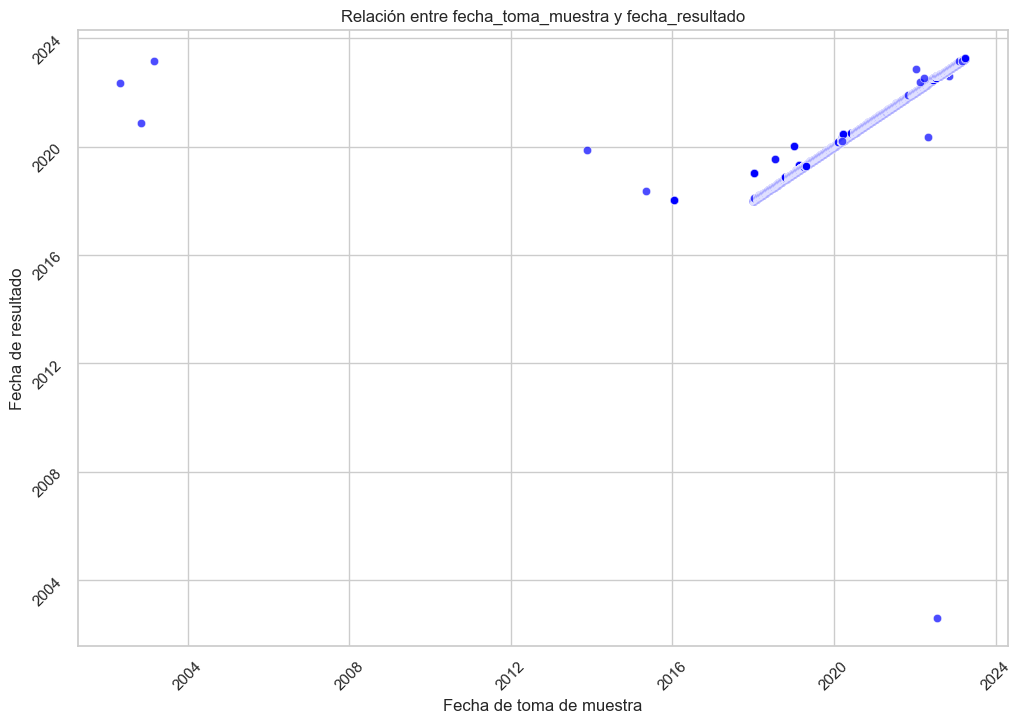

In [26]:
# Crear un scatter plot de fecha_toma_muestra vs fecha_resultado
plt.figure(figsize=(12, 8))
sns.scatterplot(x="fecha_toma_muestra", y="fecha_resultado", data=df, color="blue", alpha=0.7)
plt.title("Relación entre fecha_toma_muestra y fecha_resultado")
plt.xlabel("Fecha de toma de muestra")
plt.ylabel("Fecha de resultado")
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor visualización
plt.yticks(rotation=45)  # Rotar las etiquetas del eje y para mejor visualización
#plt.savefig("scatter_fechas_puntos_atipicos.png", bbox_inches="tight")
plt.show()


##### Arreglar fechas negativas

In [27]:
df["dias_pasados"].nsmallest(10)

21879   -7286
20598    -727
22270     -84
1374       -1
14941      -1
14942      -1
14943      -1
14944      -1
19017      -1
3           0
Name: dias_pasados, dtype: int64

In [28]:
# Seleccionar solo las columnas relevantes
columnas_relevantes = ["id", "fecha_toma_muestra", "fecha_resultado", "dias_pasados"]

# Ordenar el DataFrame por dias_pasados en orden ascendente y seleccionar las 10 primeras filas
top_10_menores = df[columnas_relevantes].sort_values(by="dias_pasados", ascending=True).head(10)

# Mostrar las 10 filas con los menores valores de dias_pasados
print("Top 10 menores valores de dias_pasados:")
top_10_menores

Top 10 menores valores de dias_pasados:


,id,fecha_toma_muestra,fecha_resultado,dias_pasados
21879,428834,2022-07-17,2002-08-05,-7286
20598,425949,2022-05-02,2020-05-05,-727
22270,430203,2022-11-08,2022-08-16,-84
1374,368187,2019-06-26,2019-06-25,-1
14941,410124,2021-05-27,2021-05-26,-1
14942,410125,2021-05-27,2021-05-26,-1
14943,410126,2021-05-27,2021-05-26,-1
19017,421719,2022-01-25,2022-01-24,-1
14944,410127,2021-05-27,2021-05-26,-1
12418,402749,2020-12-17,2020-12-17,0


In [29]:
def corregir_año_resultado(df):
    """
    Corrige el año de fecha_resultado para que sea igual al año de fecha_toma_muestra
    cuando la diferencia entre las fechas es negativa.
    """
    # Identificar filas donde dias_pasados es negativo
    filas_negativas = df[df["dias_pasados"] < 0]
    
    # Para cada fila con diferencia negativa, ajustar el año de fecha_resultado
    for index, row in filas_negativas.iterrows():
        año_toma_muestra = row["fecha_toma_muestra"].year
        nueva_fecha_resultado = row["fecha_resultado"].replace(year=año_toma_muestra)
        df.at[index, "fecha_resultado"] = nueva_fecha_resultado
    
    # Recalcular dias_pasados después de la corrección
    df["dias_pasados"] = (df["fecha_resultado"] - df["fecha_toma_muestra"]).dt.days
    
    return df

# Aplicar la función al DataFrame
df = corregir_año_resultado(df)

# Verificar que no haya valores negativos en dias_pasados
print("Valor mínimo en dias_pasados después de la corrección:", df["dias_pasados"].min())

Valor mínimo en dias_pasados después de la corrección: -84


In [30]:
# Seleccionar solo las columnas relevantes
columnas_relevantes = ["id", "fecha_toma_muestra", "fecha_resultado", "dias_pasados"]

# Ordenar el DataFrame por dias_pasados en orden ascendente y seleccionar las 10 primeras filas
top_10_menores = df[columnas_relevantes].sort_values(by="dias_pasados", ascending=True).head(10)

# Mostrar las 10 filas con los menores valores de dias_pasados
print("Top 10 menores valores de dias_pasados:")
top_10_menores

Top 10 menores valores de dias_pasados:


,id,fecha_toma_muestra,fecha_resultado,dias_pasados
22270,430203,2022-11-08,2022-08-16,-84
1374,368187,2019-06-26,2019-06-25,-1
14941,410124,2021-05-27,2021-05-26,-1
14942,410125,2021-05-27,2021-05-26,-1
14943,410126,2021-05-27,2021-05-26,-1
14944,410127,2021-05-27,2021-05-26,-1
19017,421719,2022-01-25,2022-01-24,-1
11712,400593,2020-11-11,2020-11-11,0
12098,401699,2020-11-30,2020-11-30,0
12111,401789,2020-11-30,2020-11-30,0


In [31]:
# Filtrar la fila con id = 430203
fila_corregir = df[df["id"] == 430203]

# Intercambiar mes y día en fecha_toma_muestra
fecha_toma_corregida = fila_corregir["fecha_toma_muestra"].dt.strftime("%Y-%d-%m")

# Actualizar fecha_toma_muestra en el DataFrame
df.loc[df["id"] == 430203, "fecha_toma_muestra"] = pd.to_datetime(fecha_toma_corregida)

# Recalcular dias_pasados
df["dias_pasados"] = (df["fecha_resultado"] - df["fecha_toma_muestra"]).dt.days

# Mostrar la fila corregida
print("Fila corregida:")
print(df[df["id"] == 430203][["id", "fecha_toma_muestra", "fecha_resultado", "dias_pasados"]])

Fila corregida:
           id fecha_toma_muestra fecha_resultado  dias_pasados
22270  430203         2022-08-11      2022-08-16             5


In [32]:
# Seleccionar solo las columnas relevantes
columnas_relevantes = ["id", "fecha_toma_muestra", "fecha_resultado", "dias_pasados"]

# Ordenar el DataFrame por dias_pasados en orden ascendente y seleccionar las 10 primeras filas
top_10_menores = df[columnas_relevantes].sort_values(by="dias_pasados", ascending=True).head(10)

# Mostrar las 10 filas con los menores valores de dias_pasados
print("Top 10 menores valores de dias_pasados:")
top_10_menores

Top 10 menores valores de dias_pasados:


,id,fecha_toma_muestra,fecha_resultado,dias_pasados
19017,421719,2022-01-25,2022-01-24,-1
1374,368187,2019-06-26,2019-06-25,-1
14941,410124,2021-05-27,2021-05-26,-1
14943,410126,2021-05-27,2021-05-26,-1
14944,410127,2021-05-27,2021-05-26,-1
14942,410125,2021-05-27,2021-05-26,-1
12098,401699,2020-11-30,2020-11-30,0
12097,401698,2020-11-30,2020-11-30,0
12170,401995,2020-12-03,2020-12-03,0
12096,401697,2020-11-30,2020-11-30,0


In [33]:
# Identificar filas donde dias_pasados es negativo

filas_negativas = df[df["dias_pasados"] < 0]

# Intercambiar las fechas en esas filas
df.loc[df["dias_pasados"] < 0, ["fecha_toma_muestra", "fecha_resultado"]] = df.loc[df["dias_pasados"] < 0, ["fecha_resultado", "fecha_toma_muestra"]].values

# Recalcular dias_pasados después de la corrección
df["dias_pasados"] = (df["fecha_resultado"] - df["fecha_toma_muestra"]).dt.days

# Verificar que no haya valores negativos en dias_pasados
print("Valor mínimo en dias_pasados después de la corrección:", df["dias_pasados"].min())


Valor mínimo en dias_pasados después de la corrección: 0


##### Areglas fechas postitivas

In [34]:
df_fecha2 = df.copy()

In [35]:
# Seleccionar solo las columnas relevantes
columnas_relevantes = ["id", "fecha_nacimiento", "fecha_ingreso", "fecha_toma_muestra", "fecha_resultado", "dias_pasados"]

# Ordenar el DataFrame por dias_pasados en orden descendente y seleccionar las 10 primeras filas
top_10_mayores = df_fecha2[columnas_relevantes].sort_values(by="dias_pasados", ascending=False).head(20)

# Mostrar las 10 filas con los mayores valores de dias_pasados
print("Top 10 mayores valores de dias_pasados:")
top_10_mayores

Top 10 mayores valores de dias_pasados:


,id,fecha_nacimiento,fecha_ingreso,fecha_toma_muestra,fecha_resultado,dias_pasados
20547,425811,2022-04-29,2022-04-29,2002-04-29,2022-05-02,7308
24814,437820,2023-03-04,2023-03-06,2003-03-04,2023-03-06,7307
11668,400434,2020-11-08,2020-11-09,2002-11-08,2020-11-09,6576
4330,378543,2019-11-19,2019-11-22,2013-11-19,2019-11-22,2194
26995,339653,2018-05-08,2018-05-10,2015-05-08,2018-05-10,1098
25326,332517,2016-01-15,2018-01-16,2016-01-15,2018-01-18,734
25325,332516,2016-01-15,2018-01-16,2016-01-15,2018-01-18,734
25323,332514,2016-01-15,2018-01-16,2016-01-15,2018-01-16,732
25322,332513,2016-01-15,2018-01-16,2016-01-15,2018-01-16,732
25324,332515,2016-01-15,2018-01-16,2016-01-15,2018-01-16,732


In [36]:
# Ajustar el año de fecha_toma_muestra al mismo año que fecha_resultado, excepto si fecha_resultado es en enero
df_fecha2["fecha_toma_muestra"] = df_fecha2.apply(
    lambda row: row["fecha_toma_muestra"].replace(year=row["fecha_resultado"].year) 
    if row["fecha_resultado"].month != 1 else row["fecha_toma_muestra"], 
    axis=1
)

# Recalcular dias_pasados
df_fecha2["dias_pasados"] = (df_fecha2["fecha_resultado"] - df_fecha2["fecha_toma_muestra"]).dt.days

# Mostrar el DataFrame con las fechas ajustadas
print("DataFrame con fecha_toma_muestra ajustada (excepto si fecha_resultado es en enero):")
df_fecha2[["id", "fecha_nacimiento", "fecha_ingreso", "fecha_toma_muestra", "fecha_resultado", "dias_pasados"]]

DataFrame con fecha_toma_muestra ajustada (excepto si fecha_resultado es en enero):


,id,fecha_nacimiento,fecha_ingreso,fecha_toma_muestra,fecha_resultado,dias_pasados
0,365048,2019-05-05,2019-05-06,2019-05-05,2019-05-06,1
1,365049,2019-05-04,2019-05-06,2019-05-04,2019-05-06,2
2,365050,2019-05-05,2019-05-06,2019-05-05,2019-05-06,1
3,365051,2019-05-06,2019-05-06,2019-05-06,2019-05-06,0
4,365052,2019-05-06,2019-05-07,2019-05-06,2019-05-09,3
...,...,...,...,...,...,...
33560,363768,2019-04-17,2019-04-17,2019-04-17,2019-04-22,5
33561,363999,2019-04-22,2019-04-22,2019-04-22,2019-04-22,0
33562,364000,2019-04-22,2019-04-22,2019-04-22,2019-04-22,0
33563,364001,2019-04-22,2019-04-22,2019-04-22,2019-04-22,0


In [37]:
df_fecha2[df_fecha2["id"] == 425811][["id", "fecha_nacimiento", "fecha_ingreso", "fecha_toma_muestra", "fecha_resultado", "dias_pasados"]]

,id,fecha_nacimiento,fecha_ingreso,fecha_toma_muestra,fecha_resultado,dias_pasados
20547,425811,2022-04-29,2022-04-29,2022-04-29,2022-05-02,3


In [38]:
# Seleccionar solo las columnas relevantes
columnas_relevantes = ["id", "fecha_nacimiento", "fecha_ingreso", "fecha_toma_muestra", "fecha_resultado", "dias_pasados"]

# Ordenar el DataFrame por dias_pasados en orden descendente y seleccionar las 10 primeras filas
top_10_mayores = df_fecha2[columnas_relevantes].sort_values(by="dias_pasados", ascending=False).head(30)

# Mostrar las 10 filas con los mayores valores de dias_pasados
print("Top 10 mayores valores de dias_pasados:")
top_10_mayores

Top 10 mayores valores de dias_pasados:


,id,fecha_nacimiento,fecha_ingreso,fecha_toma_muestra,fecha_resultado,dias_pasados
25325,332516,2016-01-15,2018-01-16,2016-01-15,2018-01-18,734
25326,332517,2016-01-15,2018-01-16,2016-01-15,2018-01-18,734
25322,332513,2016-01-15,2018-01-16,2016-01-15,2018-01-16,732
25323,332514,2016-01-15,2018-01-16,2016-01-15,2018-01-16,732
25324,332515,2016-01-15,2018-01-16,2016-01-15,2018-01-16,732
31465,356922,2019-01-04,2019-01-04,2018-01-04,2019-01-08,369
31464,356921,2019-01-04,2019-01-04,2018-01-04,2019-01-08,369
31468,356925,2019-01-04,2019-01-04,2018-01-04,2019-01-08,369
31467,356924,2019-01-04,2019-01-04,2018-01-04,2019-01-08,369
5270,381593,2020-01-03,2020-01-07,2019-01-03,2020-01-07,369


In [39]:
# Crear una copia del DataFrame para probar
df_copy = df_fecha2.copy()

# Asegurarse de que las columnas de fechas sean de tipo datetime
df_copy["fecha_toma_muestra"] = pd.to_datetime(df_copy["fecha_toma_muestra"], errors="coerce")
df_copy["fecha_ingreso"] = pd.to_datetime(df_copy["fecha_ingreso"], errors="coerce")

# Reemplazar el año de fecha_toma_muestra con el año de fecha_ingreso si son diferentes
df_copy["fecha_toma_muestra"] = df_copy.apply(
    lambda row: row["fecha_toma_muestra"].replace(year=int(row["fecha_ingreso"].year)) 
    if pd.notna(row["fecha_toma_muestra"]) and pd.notna(row["fecha_ingreso"]) and 
       row["fecha_toma_muestra"].year != row["fecha_ingreso"].year 
    else row["fecha_toma_muestra"], 
    axis=1
)

# Recalcular dias_pasados
df_copy["dias_pasados"] = (df_copy["fecha_resultado"] - df_copy["fecha_toma_muestra"]).dt.days

# Mostrar el DataFrame con las fechas ajustadas
print("DataFrame con año de fecha_toma_muestra ajustado al año de fecha_ingreso:")
print(df_copy[["id", "fecha_toma_muestra", "fecha_ingreso", "fecha_resultado", "dias_pasados"]])

DataFrame con año de fecha_toma_muestra ajustado al año de fecha_ingreso:
           id fecha_toma_muestra fecha_ingreso fecha_resultado  dias_pasados
0      365048         2019-05-05    2019-05-06      2019-05-06             1
1      365049         2019-05-04    2019-05-06      2019-05-06             2
2      365050         2019-05-05    2019-05-06      2019-05-06             1
3      365051         2019-05-06    2019-05-06      2019-05-06             0
4      365052         2019-05-06    2019-05-07      2019-05-09             3
...       ...                ...           ...             ...           ...
33560  363768         2019-04-17    2019-04-17      2019-04-22             5
33561  363999         2019-04-22    2019-04-22      2019-04-22             0
33562  364000         2019-04-22    2019-04-22      2019-04-22             0
33563  364001         2019-04-22    2019-04-22      2019-04-22             0
33564  364002         2019-04-22    2019-04-22      2019-04-22             0

[

In [40]:
df_copy[df_copy["id"] == 356921][["id", "fecha_nacimiento", "fecha_ingreso", "fecha_toma_muestra", "fecha_resultado", "dias_pasados"]]

,id,fecha_nacimiento,fecha_ingreso,fecha_toma_muestra,fecha_resultado,dias_pasados
31464,356921,2019-01-04,2019-01-04,2019-01-04,2019-01-08,4


In [41]:
# Seleccionar solo las columnas relevantes
columnas_relevantes = ["id", "fecha_nacimiento", "fecha_ingreso", "fecha_toma_muestra", "fecha_resultado", "dias_pasados"]

# Ordenar el DataFrame por dias_pasados en orden descendente y seleccionar las 10 primeras filas
top_10_mayores = df_copy[columnas_relevantes].sort_values(by="dias_pasados", ascending=False).head(30)

# Mostrar las 10 filas con los mayores valores de dias_pasados
print("Top 10 mayores valores de dias_pasados:")
top_10_mayores

Top 10 mayores valores de dias_pasados:


,id,fecha_nacimiento,fecha_ingreso,fecha_toma_muestra,fecha_resultado,dias_pasados
13885,407087,2021-03-21,2020-03-23,2020-03-21,2021-03-23,367
18681,420785,2022-01-01,2021-12-31,2021-01-01,2022-01-03,367
23519,433762,2022-11-11,2022-11-11,2022-01-11,2022-11-15,308
21523,428099,2022-06-26,2022-06-28,2022-03-26,2022-07-18,114
8521,391803,2020-06-20,2020-06-22,2020-03-20,2020-06-23,95
8513,391795,2020-06-20,2020-06-22,2020-03-20,2020-06-23,95
8519,391801,2020-06-20,2020-06-22,2020-03-20,2020-06-23,95
8517,391799,2020-06-20,2020-06-22,2020-03-20,2020-06-23,95
8516,391798,2020-06-20,2020-06-22,2020-03-20,2020-06-23,95
8515,391797,2020-06-20,2020-06-22,2020-03-20,2020-06-23,95


In [42]:
df_copy[df_copy["id"] == 332516][["id", "fecha_nacimiento", "fecha_ingreso", "fecha_toma_muestra", "fecha_resultado", "dias_pasados"]]

,id,fecha_nacimiento,fecha_ingreso,fecha_toma_muestra,fecha_resultado,dias_pasados
25325,332516,2016-01-15,2018-01-16,2018-01-15,2018-01-18,3


In [43]:
# Lista de IDs específicos a corregir
ids_a_corregir = [407087, 420785]

# Para cada ID específico, ajustar el año de fecha_toma_muestra y fecha_ingreso al año de fecha_nacimiento
for id in ids_a_corregir:
    # Obtener el año de fecha_nacimiento para el ID actual
    año_nacimiento = df_copy.loc[df_copy["id"] == id, "fecha_nacimiento"].dt.year.iloc[0]
    
    # Ajustar el año de fecha_toma_muestra y fecha_ingreso
    df_copy.loc[df_copy["id"] == id, "fecha_toma_muestra"] = df_copy.loc[df_copy["id"] == id, "fecha_toma_muestra"].apply(
        lambda x: x.replace(year=año_nacimiento) if pd.notna(x) else x
    )
    df_copy.loc[df_copy["id"] == id, "fecha_ingreso"] = df_copy.loc[df_copy["id"] == id, "fecha_ingreso"].apply(
        lambda x: x.replace(year=año_nacimiento) if pd.notna(x) else x
    )

# Recalcular dias_pasados
df_copy["dias_pasados"] = (df_copy["fecha_resultado"] - df_copy["fecha_toma_muestra"]).dt.days

# Mostrar las filas corregidas
print("Filas corregidas:")
print(df_copy[df_copy["id"].isin(ids_a_corregir)][["id", "fecha_nacimiento", "fecha_ingreso", "fecha_toma_muestra", "fecha_resultado", "dias_pasados"]])

Filas corregidas:
           id fecha_nacimiento fecha_ingreso fecha_toma_muestra  \
13885  407087       2021-03-21    2021-03-23         2021-03-21   
18681  420785       2022-01-01    2022-12-31         2022-01-01   

      fecha_resultado  dias_pasados  
13885      2021-03-23             2  
18681      2022-01-03             2  


In [44]:
df_copy[df_copy["id"] == 407087][["id", "fecha_nacimiento", "fecha_ingreso", "fecha_toma_muestra", "fecha_resultado", "dias_pasados"]]

,id,fecha_nacimiento,fecha_ingreso,fecha_toma_muestra,fecha_resultado,dias_pasados
13885,407087,2021-03-21,2021-03-23,2021-03-21,2021-03-23,2


In [45]:
# Seleccionar solo las columnas relevantes
columnas_relevantes = ["id", "fecha_nacimiento", "fecha_ingreso", "fecha_toma_muestra", "fecha_resultado", "dias_pasados"]

# Ordenar el DataFrame por dias_pasados en orden descendente y seleccionar las 10 primeras filas
top_10_mayores = df_copy[columnas_relevantes].sort_values(by="dias_pasados", ascending=False).head(60)

# Mostrar las 10 filas con los mayores valores de dias_pasados
print("Top 10 mayores valores de dias_pasados:")
top_10_mayores

Top 10 mayores valores de dias_pasados:


,id,fecha_nacimiento,fecha_ingreso,fecha_toma_muestra,fecha_resultado,dias_pasados
23519,433762,2022-11-11,2022-11-11,2022-01-11,2022-11-15,308
21523,428099,2022-06-26,2022-06-28,2022-03-26,2022-07-18,114
8512,391794,2020-06-20,2020-06-22,2020-03-20,2020-06-23,95
8518,391800,2020-06-20,2020-06-22,2020-03-20,2020-06-23,95
8510,391792,2020-06-20,2020-06-22,2020-03-20,2020-06-23,95
8513,391795,2020-06-20,2020-06-22,2020-03-20,2020-06-23,95
8514,391796,2020-06-20,2020-06-22,2020-03-20,2020-06-23,95
8515,391797,2020-06-20,2020-06-22,2020-03-20,2020-06-23,95
8516,391798,2020-06-20,2020-06-22,2020-03-20,2020-06-23,95
8517,391799,2020-06-20,2020-06-22,2020-03-20,2020-06-23,95


In [46]:
# Aplicar la lógica para cambiar el mes de fecha_toma_muestra
df_copy["fecha_toma_muestra"] = df_copy.apply(
    lambda row: row["fecha_toma_muestra"].replace(month=row["fecha_ingreso"].month)
    if row["dias_pasados"] >= 29 and row["fecha_toma_muestra"].month != row["fecha_ingreso"].month
    else row["fecha_toma_muestra"],
    axis=1
)

# Recalcular dias_pasados
df_copy["dias_pasados"] = (df_copy["fecha_resultado"] - df_copy["fecha_toma_muestra"]).dt.days

# Mostrar las filas corregidas
print("Filas corregidas:")
print(df_copy[df_copy["dias_pasados"] >= 29][["id", "fecha_toma_muestra", "fecha_ingreso", "fecha_resultado", "dias_pasados"]])

Filas corregidas:
           id fecha_toma_muestra fecha_ingreso fecha_resultado  dias_pasados
6545   385937         2020-03-13    2020-03-16      2020-05-04            52
15704  412337         2021-07-11    2021-07-12      2021-08-17            37
21312  427582         2022-06-13    2022-06-14      2022-07-14            31


In [47]:
# Seleccionar solo las columnas relevantes
columnas_relevantes = ["id", "fecha_nacimiento", "fecha_ingreso", "fecha_toma_muestra", "fecha_resultado", "dias_pasados"]

# Ordenar el DataFrame por dias_pasados en orden descendente y seleccionar las 10 primeras filas
top_10_mayores = df_copy[columnas_relevantes].sort_values(by="dias_pasados", ascending=False).head(60)

# Mostrar las 10 filas con los mayores valores de dias_pasados
print("Top 10 mayores valores de dias_pasados:")
top_10_mayores

Top 10 mayores valores de dias_pasados:


,id,fecha_nacimiento,fecha_ingreso,fecha_toma_muestra,fecha_resultado,dias_pasados
6545,385937,2020-03-13,2020-03-16,2020-03-13,2020-05-04,52
15704,412337,2021-07-11,2021-07-12,2021-07-11,2021-08-17,37
21312,427582,2022-06-13,2022-06-14,2022-06-13,2022-07-14,31
21376,427678,2022-06-16,2022-06-17,2022-06-16,2022-07-14,28
21383,427685,2022-06-16,2022-06-17,2022-06-16,2022-07-14,28
21382,427684,2022-06-16,2022-06-17,2022-06-16,2022-07-14,28
21381,427683,2022-06-16,2022-06-17,2022-06-16,2022-07-14,28
21380,427682,2022-06-16,2022-06-17,2022-06-16,2022-07-14,28
21377,427679,2022-06-16,2022-06-17,2022-06-16,2022-07-14,28
21366,427668,2022-06-16,2022-06-17,2022-06-16,2022-07-14,28


In [43]:
df_validas = df2b.dropna(subset=['fecha_toma_muestra', 'fecha_toma_muestra_2', 'fecha_resultado_muestra_2'])
# Filtrar filas donde el año de fecha_toma_muestra_2 es diferente al de fecha_toma_muestra
filas_años_diferentes_muestras2 = df_validas[df_validas["fecha_toma_muestra_2"].dt.year != df_validas["fecha_toma_muestra"].dt.year]
filas_años_diferentes_muestras2[["fecha_toma_muestra", "fecha_toma_muestra_2", 'fecha_resultado_muestra_2']]

,fecha_toma_muestra,fecha_toma_muestra_2,fecha_resultado_muestra_2
5101,2019-12-29,2020-01-01,2020-01-02
5123,2019-12-29,2020-01-03,2020-01-07
5766,2020-02-02,2029-02-07,2020-02-10
18921,2022-01-18,2021-01-21,2022-01-24
24090,2022-12-27,2023-01-03,2023-01-05
25978,2018-03-05,2017-03-10,2018-03-15
28034,2018-07-10,2008-07-18,2018-07-23
30097,2018-10-29,2008-11-14,2018-11-15
31082,2018-12-14,2019-01-03,2019-01-04
31219,2018-12-22,2019-01-02,2019-01-04


In [49]:
# Crear una copia del DataFrame para probar
df_copy2 = df_copy.copy()

# Asegurarse de que las columnas de fechas sean de tipo datetime
df_copy2["fecha_nacimiento"] = pd.to_datetime(df_copy2["fecha_nacimiento"], errors="coerce")
df_copy2["fecha_toma_muestra"] = pd.to_datetime(df_copy2["fecha_toma_muestra"], errors="coerce")

# Llenar los valores vacíos en fecha_nacimiento con fecha_toma_muestra
df_copy2["fecha_nacimiento"] = df_copy2["fecha_nacimiento"].fillna(df_copy2["fecha_toma_muestra"])

# Mostrar las filas corregidas
print("Filas con valores vacíos en fecha_nacimiento corregidos:")
print(df_copy2[df_copy2["fecha_nacimiento"].isna()][["id", "fecha_nacimiento", "fecha_toma_muestra"]])

Filas con valores vacíos en fecha_nacimiento corregidos:
Empty DataFrame
Columns: [id, fecha_nacimiento, fecha_toma_muestra]
Index: []


In [50]:
df_copy2[df_copy2["id"] == 407087][["id", "fecha_nacimiento", "fecha_ingreso", "fecha_toma_muestra", "fecha_resultado", "dias_pasados"]]

,id,fecha_nacimiento,fecha_ingreso,fecha_toma_muestra,fecha_resultado,dias_pasados
13885,407087,2021-03-21,2021-03-23,2021-03-21,2021-03-23,2


In [51]:
# Filtrar filas donde el año de fecha_nacimiento y fecha_ingreso sean diferentes
#filas_años_diferentes = df_copy[df_copy["fecha_nacimiento"].dt.year != df_copy["fecha_ingreso"].dt.year]
filas_años_diferentes = df_copy2[df_copy2["fecha_nacimiento"].dt.year != df_copy2["fecha_ingreso"].dt.year]

# Mostrar las filas con años diferentes
print("Filas con años de fecha_nacimiento y fecha_ingreso diferentes:")
filas_años_diferentes[["id", "fecha_nacimiento", "fecha_ingreso", "fecha_toma_muestra", "fecha_resultado", "dias_pasados"]]

Filas con años de fecha_nacimiento y fecha_ingreso diferentes:


,id,fecha_nacimiento,fecha_ingreso,fecha_toma_muestra,fecha_resultado,dias_pasados
1514,368645,2016-07-02,2019-07-02,2019-07-02,2019-07-02,0
1515,368646,2016-07-02,2019-07-02,2019-07-02,2019-07-02,0
1516,368647,2016-07-02,2019-07-02,2019-07-02,2019-07-02,0
1627,369161,2018-07-09,2019-07-09,2019-07-09,2019-07-11,2
1628,369162,2018-07-09,2019-07-09,2019-07-09,2019-07-11,2
1629,369164,2018-07-09,2019-07-10,2019-07-09,2019-07-11,2
1630,369166,2018-07-09,2019-07-10,2019-07-09,2019-07-11,2
1631,369167,2018-07-09,2019-07-10,2019-07-09,2019-07-11,2
1632,369168,2018-07-09,2019-07-10,2019-07-09,2019-07-11,2
1633,369169,2018-07-09,2019-07-10,2019-07-09,2019-07-11,2


In [52]:
# Ajustar el año de fecha_nacimiento al año de fecha_ingreso en las filas con años diferentes
filas_años_diferentes["fecha_nacimiento"] = filas_años_diferentes.apply(
    lambda row: row["fecha_nacimiento"].replace(year=row["fecha_ingreso"].year),
    axis=1
)

# Actualizar el DataFrame original con las filas corregidas
df_copy2.update(filas_años_diferentes)

# Mostrar las filas corregidas
print("Filas con año de fecha_nacimiento ajustado:")
filas_años_diferentes[["id", "fecha_nacimiento", "fecha_ingreso"]]

Filas con año de fecha_nacimiento ajustado:


,id,fecha_nacimiento,fecha_ingreso
1514,368645,2019-07-02,2019-07-02
1515,368646,2019-07-02,2019-07-02
1516,368647,2019-07-02,2019-07-02
1627,369161,2019-07-09,2019-07-09
1628,369162,2019-07-09,2019-07-09
1629,369164,2019-07-09,2019-07-10
1630,369166,2019-07-09,2019-07-10
1631,369167,2019-07-09,2019-07-10
1632,369168,2019-07-09,2019-07-10
1633,369169,2019-07-09,2019-07-10


In [53]:
# Seleccionar solo las columnas relevantes
columnas_relevantes = ["id", "fecha_toma_muestra", "fecha_resultado", "dias_pasados"]

# Ordenar el DataFrame por dias_pasados en orden descendente y seleccionar las 10 primeras filas
top_10_mayores = df_copy2[columnas_relevantes].sort_values(by="dias_pasados", ascending=False).head(20)

# Mostrar las 10 filas con los mayores valores de dias_pasados
print("Top 10 mayores valores de dias_pasados:")
top_10_mayores

Top 10 mayores valores de dias_pasados:


,id,fecha_toma_muestra,fecha_resultado,dias_pasados
6545,385937,2020-03-13,2020-05-04,52
15704,412337,2021-07-11,2021-08-17,37
21312,427582,2022-06-13,2022-07-14,31
21376,427678,2022-06-16,2022-07-14,28
21383,427685,2022-06-16,2022-07-14,28
21382,427684,2022-06-16,2022-07-14,28
21381,427683,2022-06-16,2022-07-14,28
21380,427682,2022-06-16,2022-07-14,28
21377,427679,2022-06-16,2022-07-14,28
21366,427668,2022-06-16,2022-07-14,28


#### Segunda limpieza

In [4]:
# arreglar fecha2, pesos, y convertir tipos de datos para analisis
#df_copy2.to_csv("dataset_corregido.csv", index=False)
#df_copy2.to_excel("dataset_corregido_v1.xlsx", index=False)
df = pd.read_excel("dataset_corregido_v1.xlsx")

In [5]:
df.head(5)

,id,ficha_id,fecha_ingreso,institucion,ars,historia_clinica,tipo_documento,numero_documento,ciudad,departamento,...,fecha_toma_muestra_2,fecha_resultado_muestra_2,resultado_muestra_2,contador,muestra_rechazada,fecha_toma_rechazada,tipo_vinculacion,resultado_rechazada,fecha_resultado_rechazada,dias_pasados
0,365048,369980,2019-05-06,VICTORIA,MEDIMAS,1023943178,1,1023943178,Bogota,Cundinamarca,...,NaT,NaT,0.0,1.0,False,NaT,NaN,NaN,NaT,1
1,365049,369981,2019-05-06,VICTORIA,CAPITAL SALUD,1006844618,2,1006844618,Bogota,Cundinamarca,...,NaT,NaT,0.0,1.0,False,NaT,NaN,NaN,NaT,2
2,365050,369982,2019-05-06,VICTORIA,CAPITAL SALUD,1010045133,1,1010045133,Bogota,Cundinamarca,...,NaT,NaT,0.0,1.0,False,NaT,NaN,NaN,NaT,1
3,365051,369983,2019-05-06,VICTORIA,CAPITAL SALUD,1023936117,1,1023936117,Bogota,Cundinamarca,...,NaT,NaT,0.0,1.0,False,NaT,NaN,NaN,NaT,0
4,365052,369984,2019-05-07,VICTORIA,VINCULADO,VEN003927,4,VEN003927,Bogota,Cundinamarca,...,NaT,NaT,0.0,1.0,False,NaT,NaN,NaN,NaT,3


In [6]:
df2 = df.copy()

In [7]:
# cambiar peso de flotante a entero(los valores vacios sera 0)
df2["peso"] = df2["peso"].fillna(0)
df2["peso"] = df2["peso"].astype(int)
# cambiar contador de flotante a entero
df2["contador"] = df2["contador"].fillna(0)
df2["contador"] = df2["contador"].astype(int)

df2["ficha_id_2"] = df2["ficha_id_2"].fillna(0)
df2["ficha_id_2"] = df2["ficha_id_2"].astype(int)

In [8]:
df2.dtypes

id                                    int64
ficha_id                              int64
fecha_ingreso                datetime64[ns]
institucion                          object
ars                                  object
historia_clinica                     object
tipo_documento                        int64
numero_documento                     object
ciudad                               object
departamento                         object
telefono_1                            int64
telefono_2                            int64
direccion                            object
apellido_1                           object
apellido_2                           object
nombre_hijo                          object
fecha_nacimiento             datetime64[ns]
peso                                  int64
sexo                                 object
prematuro                              bool
transfundido                           bool
informacion_completa                   bool
muestra_adecuada                

| Errores a corregir  | metricas |
| ------------- | ------------- |
| **telefono_1** y **telefono_2**: telefonos con cantidad de numeros que no concuerdan | prematuros vs sexo  |
| tercer apellido en direccion del id 381213  | Content Cell  |
| 401221 y 411367 sin primer apellido  | Content Cell  |
| **peso:** demasiada variacion  | Content Cell  |
| **fecha_toma_muestra_2** no concuerda con otras fechas  | Content Cell  |

##### telefeno

In [9]:
# Función para verificar si un número tiene 10 dígitos (excluyendo 0)
def tiene_10_digitos(numero):
    if numero == 0:  # Si es 0, lo consideramos "válido" para omitirlo
        return True
    # Convertir a cadena para contar dígitos
    return len(str(numero)) == 10

# Filtrar filas donde al menos uno de los teléfonos no tiene 10 dígitos
#filtro = ~(df["telefono_1"].apply(tiene_10_digitos) | df["telefono_2"].apply(tiene_10_digitos))
filtro = ~(df2["telefono_1"].apply(tiene_10_digitos)) # obtiene los que no tienen 10 digitos
telefonos_invalidos = df[filtro]

# Mostrar el resultado
print("Filas con al menos un teléfono que no tiene 10 dígitos (excluyendo 0):")
#telefonos_invalidos[["telefono_1", "telefono_2"]]
telefonos_invalidos[["id", "telefono_1"]]


Filas con al menos un teléfono que no tiene 10 dígitos (excluyendo 0):


,id,telefono_1
18,374701,2463163
32,363924,322385055
59,363975,8146581
78,363969,3745275
83,363984,2339222
...,...,...
33468,362623,322229104
33533,363081,3098909
33534,363082,321366387
33544,363092,7927848


In [10]:
filtro = ~(df2["telefono_2"].apply(tiene_10_digitos))
telefonos_invalidos = df[filtro]

# Mostrar el resultado
print("Filas con al menos un teléfono que no tiene 10 dígitos (excluyendo 0):")
#telefonos_invalidos[["telefono_1", "telefono_2"]]
telefonos_invalidos[["id", "telefono_2"]]

Filas con al menos un teléfono que no tiene 10 dígitos (excluyendo 0):


,id,telefono_2
1984,370503,3654483
9780,395161,3719128
11944,401230,7202271
15475,411716,311547513
15503,411744,4848058
15977,413068,321229009
16780,415490,3725610
17029,416199,8119921
17081,416371,32230455923
18703,420874,64634


##### errores puntuales

In [11]:
df2[df2["id"] == 381213][["id", "direccion"]]

,id,direccion
5171,381213,\npeREZ


In [12]:
# borrar apellido en direccion
df2.loc[df2["id"] == 381213, "direccion"] = ""
df2[df2["id"] == 381213][["id", "direccion"]]

,id,direccion
5171,381213,


In [13]:
# no presentan apellido_1
df2[df2["apellido_1"].isna()][["id", "apellido_1", "apellido_2"]]

,id,apellido_1,apellido_2
11935,401221,NaN,VARGASVargas
15359,411367,NaN,Alfonso


In [14]:
# cambiando el apellido_2
df2.loc[df2["id"] == 401221, "apellido_2"] = "Vargas"

In [15]:
df2[df2["apellido_1"].isna()][["id", "apellido_1", "apellido_2"]]

,id,apellido_1,apellido_2
11935,401221,NaN,Vargas
15359,411367,NaN,Alfonso


##### fecha2

In [47]:
df_f2 = df2.copy()

In [48]:
df_f2.head()


,id,ficha_id,fecha_ingreso,institucion,ars,historia_clinica,tipo_documento,numero_documento,ciudad,departamento,...,fecha_toma_muestra_2,fecha_resultado_muestra_2,resultado_muestra_2,contador,muestra_rechazada,fecha_toma_rechazada,tipo_vinculacion,resultado_rechazada,fecha_resultado_rechazada,dias_pasados
0,365048,369980,2019-05-06,VICTORIA,MEDIMAS,1023943178,1,1023943178,Bogota,Cundinamarca,...,NaT,NaT,0,1,False,NaT,NaN,NaN,NaT,1
1,365049,369981,2019-05-06,VICTORIA,CAPITAL SALUD,1006844618,2,1006844618,Bogota,Cundinamarca,...,NaT,NaT,0,1,False,NaT,NaN,NaN,NaT,2
2,365050,369982,2019-05-06,VICTORIA,CAPITAL SALUD,1010045133,1,1010045133,Bogota,Cundinamarca,...,NaT,NaT,0,1,False,NaT,NaN,NaN,NaT,1
3,365051,369983,2019-05-06,VICTORIA,CAPITAL SALUD,1023936117,1,1023936117,Bogota,Cundinamarca,...,NaT,NaT,0,1,False,NaT,NaN,NaN,NaT,0
4,365052,369984,2019-05-07,VICTORIA,VINCULADO,VEN003927,4,VEN003927,Bogota,Cundinamarca,...,NaT,NaT,0,1,False,NaT,NaN,NaN,NaT,3


In [49]:
df_validas = df_f2.dropna(subset=['fecha_toma_muestra', 'fecha_toma_muestra_2'])
df_toma2 = df_validas[df_validas["fecha_toma_muestra_2"].dt.year != df_validas["fecha_toma_muestra"].dt.year]
df_toma2[["id", "fecha_toma_muestra", "fecha_toma_muestra_2", 'fecha_resultado_muestra_2']]

,id,fecha_toma_muestra,fecha_toma_muestra_2,fecha_resultado_muestra_2
5101,381018,2019-12-29,2020-01-01,2020-01-02
5123,381114,2019-12-29,2020-01-03,2020-01-07
5766,383293,2020-02-02,2029-02-07,2020-02-10
18921,421485,2022-01-18,2021-01-21,2022-01-24
24090,435500,2022-12-27,2023-01-03,2023-01-05
25978,335492,2018-03-05,2017-03-10,2018-03-15
28034,344229,2018-07-10,2008-07-18,2018-07-23
30097,352606,2018-10-29,2008-11-14,2018-11-15
31082,355770,2018-12-14,2019-01-03,2019-01-04
31219,356171,2018-12-22,2019-01-02,2019-01-04


In [50]:
print(len(df_toma2))

13


In [51]:
ids_especificos = [378461, 331622, 394216, 383293,  363768]

df_ids = df_f2[df_f2["id"].isin(ids_especificos)]
df_ids[["id", "fecha_toma_muestra", "fecha_toma_muestra_2", 'fecha_resultado_muestra_2']]

,id,fecha_toma_muestra,fecha_toma_muestra_2,fecha_resultado_muestra_2
4313,378461,2019-11-20,2019-11-26,NaT
5766,383293,2020-02-02,2029-02-07,2020-02-10
9424,394216,2020-07-31,2020-08-05,2010-08-06
25133,331622,2020-03-17,2020-03-14,NaT
33560,363768,2019-04-17,2019-04-24,2019-04-25


In [52]:
# Fecha actual (hoy: 17 de marzo de 2025)
fecha_actual = pd.to_datetime('2025-03-18')

# 1. Crear máscara para filas donde:
# - fecha_toma_muestra_2 NO es nula
# - fecha_resultado_muestra_2 ES nula
mascara = df_f2["fecha_toma_muestra_2"].notna() & df_f2["fecha_resultado_muestra_2"].isna()

# 2. Asignar fecha actual a las filas que cumplen la condición
df_f2.loc[mascara, "fecha_resultado_muestra_2"] = fecha_actual


In [53]:
df_ids = df_f2[df_f2["id"].isin(ids_especificos)]
df_ids[["id", "fecha_toma_muestra", "fecha_toma_muestra_2", 'fecha_resultado_muestra_2']]

,id,fecha_toma_muestra,fecha_toma_muestra_2,fecha_resultado_muestra_2
4313,378461,2019-11-20,2019-11-26,2025-03-18
5766,383293,2020-02-02,2029-02-07,2020-02-10
9424,394216,2020-07-31,2020-08-05,2010-08-06
25133,331622,2020-03-17,2020-03-14,2025-03-18
33560,363768,2019-04-17,2019-04-24,2019-04-25


In [54]:
# 3. Recalcular la columna de días pasados (si es necesario)
df_f2["dias_pasados2"] = (df_f2["fecha_resultado_muestra_2"] - df_f2["fecha_toma_muestra_2"]).dt.days


In [55]:
df_ids = df_f2[df_f2["id"].isin(ids_especificos)]
df_ids[["id", "fecha_toma_muestra", "fecha_toma_muestra_2", 'fecha_resultado_muestra_2', 'dias_pasados2']]

,id,fecha_toma_muestra,fecha_toma_muestra_2,fecha_resultado_muestra_2,dias_pasados2
4313,378461,2019-11-20,2019-11-26,2025-03-18,1939
5766,383293,2020-02-02,2029-02-07,2020-02-10,-3285
9424,394216,2020-07-31,2020-08-05,2010-08-06,-3652
25133,331622,2020-03-17,2020-03-14,2025-03-18,1830
33560,363768,2019-04-17,2019-04-24,2019-04-25,1


In [56]:
df_f2["dias_pasados2"].describe()

count     551
mean       11
std       325
min     -3652
25%         1
50%         2
75%         3
max      3657
Name: dias_pasados2, dtype: float64

In [57]:
# Seleccionar solo las columnas relevantes
columnas_relevantes = ["id", "fecha_toma_muestra", "fecha_toma_muestra_2", 'fecha_resultado_muestra_2', "dias_pasados2"]

# Ordenar el DataFrame por dias_pasados en orden descendente y seleccionar las 10 primeras filas
top_10_mayores = df_f2[columnas_relevantes].sort_values(by="dias_pasados2", ascending=False).head(20)

# Mostrar las 10 filas con los mayores valores de dias_pasados
print("Top 10 mayores valores de dias_pasados:")
top_10_mayores

Top 10 mayores valores de dias_pasados:


,id,fecha_toma_muestra,fecha_toma_muestra_2,fecha_resultado_muestra_2,dias_pasados2
28034,344229,2018-07-10,2008-07-18,2018-07-23,3657
30097,352606,2018-10-29,2008-11-14,2018-11-15,3653
4313,378461,2019-11-20,2019-11-26,2025-03-18,1939
25133,331622,2020-03-17,2020-03-14,2025-03-18,1830
25978,335492,2018-03-05,2017-03-10,2018-03-15,370
18921,421485,2022-01-18,2021-01-21,2022-01-24,368
21335,427605,2022-06-14,2022-06-17,2022-07-14,27
21696,428450,2022-07-06,2022-07-20,2022-08-05,16
21745,428554,2022-07-09,2022-07-20,2022-08-05,16
21771,428596,2022-07-10,2022-07-21,2022-08-05,15


In [58]:
# Ordenar el DataFrame por dias_pasados en orden descendente y seleccionar las 10 primeras filas
top_10_menores = df_f2[columnas_relevantes].sort_values(by="dias_pasados2", ascending=True).head(5)

# Mostrar las 10 filas con los mayores valores de dias_pasados
print("Top 10 menores valores de dias_pasados:")
top_10_menores

Top 10 menores valores de dias_pasados:


,id,fecha_toma_muestra,fecha_toma_muestra_2,fecha_resultado_muestra_2,dias_pasados2
9424,394216,2020-07-31,2020-08-05,2010-08-06,-3652
5766,383293,2020-02-02,2029-02-07,2020-02-10,-3285
5276,381599,2020-01-05,2020-01-09,2020-01-09,0
1555,368934,2019-07-04,2019-07-11,2019-07-11,0
26391,337215,2018-04-02,2018-04-05,2018-04-05,0


In [59]:
df_fechas_atipicas = df_f2[(df_f2["dias_pasados2"] < 0) | (df_f2["dias_pasados2"] > 30)]
df_fechas_atipicas[columnas_relevantes]

,id,fecha_toma_muestra,fecha_toma_muestra_2,fecha_resultado_muestra_2,dias_pasados2
4313,378461,2019-11-20,2019-11-26,2025-03-18,1939
5766,383293,2020-02-02,2029-02-07,2020-02-10,-3285
9424,394216,2020-07-31,2020-08-05,2010-08-06,-3652
18921,421485,2022-01-18,2021-01-21,2022-01-24,368
25133,331622,2020-03-17,2020-03-14,2025-03-18,1830
25978,335492,2018-03-05,2017-03-10,2018-03-15,370
28034,344229,2018-07-10,2008-07-18,2018-07-23,3657
30097,352606,2018-10-29,2008-11-14,2018-11-15,3653


In [60]:
from datetime import datetime

# Crear una copia de df_f2 para trabajar
df_f2_corregido = df_f2.copy()

# Suponiendo que tienes tu DataFrame df_f2
def corregir_fechas(row):
    fechas = [
        row['fecha_toma_muestra'],
        row['fecha_toma_muestra_2'],
        row['fecha_resultado_muestra_2']
    ]
    # Convertir a datetime
    fechas_dt = [pd.to_datetime(f) for f in fechas]
    # Extraer años
    años = [f.year for f in fechas_dt]
    # Encontrar el año más común
    año_comun = max(set(años), key=años.count)
    
    # Ajustar el año que no coincide
    for i, año in enumerate(años):
        if año != año_comun:
            fechas_dt[i] = fechas_dt[i].replace(year=año_comun)
    
    # Verificar si fecha_resultado_muestra_2 es anterior a fecha_toma_muestra_2
    if fechas_dt[2] < fechas_dt[1]:
        fechas_dt[2] = fechas_dt[2].replace(year=año_comun + 1)
    
    # Calcular días pasados
    dias_pasados = (fechas_dt[2] - fechas_dt[1]).days
    
    return pd.Series({
        'fecha_toma_muestra': fechas_dt[0],
        'fecha_toma_muestra_2': fechas_dt[1],
        'fecha_resultado_muestra_2': fechas_dt[2],
        'dias_pasados2': dias_pasados
    })

# Identificar filas atípicas
mask_atipicas = (df_f2_corregido["dias_pasados2"] < 0) | (df_f2_corregido["dias_pasados2"] > 30)

# Aplicar la corrección solo a las filas atípicas
df_f2_corregido.loc[mask_atipicas, ['fecha_toma_muestra', 'fecha_toma_muestra_2', 'fecha_resultado_muestra_2', 'dias_pasados2']] = \
    df_f2_corregido[mask_atipicas].apply(corregir_fechas, axis=1)

# Mostrar el DataFrame corregido
print(df_f2_corregido)



           id  ficha_id fecha_ingreso       institucion            ars  \
0      365048    369980    2019-05-06          VICTORIA        MEDIMAS   
1      365049    369981    2019-05-06          VICTORIA  CAPITAL SALUD   
2      365050    369982    2019-05-06          VICTORIA  CAPITAL SALUD   
3      365051    369983    2019-05-06          VICTORIA  CAPITAL SALUD   
4      365052    369984    2019-05-07          VICTORIA      VINCULADO   
...       ...       ...           ...               ...            ...   
33560  363768    368669    2019-04-17  MATERNO INFANTIL  CAPITAL SALUD   
33561  363999    368899    2019-04-22  MATERNO INFANTIL  CAPITAL SALUD   
33562  364000    368900    2019-04-22  MATERNO INFANTIL  CAPITAL SALUD   
33563  364001    368901    2019-04-22  MATERNO INFANTIL  CAPITAL SALUD   
33564  364002    368902    2019-04-22  MATERNO INFANTIL      FAMISANAR   

      historia_clinica  tipo_documento numero_documento  ciudad  departamento  \
0           1023943178        

In [61]:
df_f2_corregido["dias_pasados2"].describe()


count   551
mean      3
std       5
min       0
25%       1
50%       2
75%       3
max     113
Name: dias_pasados2, dtype: float64

In [62]:

ids_especificos2 = [378461, 383293, 394216, 421485, 331622, 335492, 344229, 352606]
df_ids2 = df_f2_corregido[df_f2_corregido["id"].isin(ids_especificos2)]
df_ids2[columnas_relevantes]

,id,fecha_toma_muestra,fecha_toma_muestra_2,fecha_resultado_muestra_2,dias_pasados2
4313,378461,2019-11-20,2019-11-26,2020-03-18,113
5766,383293,2020-02-02,2020-02-07,2020-02-10,3
9424,394216,2020-07-31,2020-08-05,2020-08-06,1
18921,421485,2022-01-18,2022-01-21,2022-01-24,3
25133,331622,2020-03-17,2020-03-14,2020-03-18,4
25978,335492,2018-03-05,2018-03-10,2018-03-15,5
28034,344229,2018-07-10,2018-07-18,2018-07-23,5
30097,352606,2018-10-29,2018-11-14,2018-11-15,1


In [63]:
df_fechas_atipicas = df_f2_corregido[(df_f2_corregido["dias_pasados2"] < 0) | (df_f2_corregido["dias_pasados2"] > 30)]
df_fechas_atipicas[columnas_relevantes]

,id,fecha_toma_muestra,fecha_toma_muestra_2,fecha_resultado_muestra_2,dias_pasados2
4313,378461,2019-11-20,2019-11-26,2020-03-18,113


##### peso

In [64]:
df_peso = df_f2_corregido.copy()

In [65]:
pd.set_option("display.float_format", lambda x: "%.0f" % x)
df_peso["peso"].describe()

count     33565
mean       3042
std       25124
min           0
25%        2660
50%        2970
75%        3250
max     4603371
Name: peso, dtype: float64

In [66]:
# Suponiendo que tu DataFrame se llama 'df' y la columna es 'peso'
# Calcular cuartiles
Q1 = df_peso['peso'].quantile(0.25)
Q3 = df_peso['peso'].quantile(0.75)
IQR = Q3 - Q1

# Calcular límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar atípicos
atipicos = df_peso[(df_peso['peso'] < limite_inferior) | (df_peso['peso'] > limite_superior)]
normales = df_peso[(df_peso['peso'] >= limite_inferior) & (df_peso['peso'] <= limite_superior)]

print(f"Límite inferior: {limite_inferior}")
print(f"Límite superior: {limite_superior}")
#print("\nDatos atípicos:")
#print(atipicos)
#print("\nDatos no atípicos:")
#print(normales)

Límite inferior: 1775.0
Límite superior: 4135.0


In [67]:
atipicos["peso"]

26          0
27          0
56       1190
79       1420
101         0
         ... 
33404     480
33406     630
33416     746
33428    1710
33433       0
Name: peso, Length: 1476, dtype: int64

In [68]:
# Separar atípicos y no atípicos
''''
df['es_atipico'] = (df['peso'] < limite_inferior) | (df['peso'] > limite_superior)

# Aplicar la conversión solo a los no atípicos
df.loc[~df['es_atipico'], 'peso'] = df.loc[~df['es_atipico'], 'peso'].apply(convertir_peso)

print("DataFrame procesado:")
print(df)
'''

'\'\ndf[\'es_atipico\'] = (df[\'peso\'] < limite_inferior) | (df[\'peso\'] > limite_superior)\n\n# Aplicar la conversión solo a los no atípicos\ndf.loc[~df[\'es_atipico\'], \'peso\'] = df.loc[~df[\'es_atipico\'], \'peso\'].apply(convertir_peso)\n\nprint("DataFrame procesado:")\nprint(df)\n'

In [69]:
def convertir_peso(valor):
    # Convertimos a string para contar dígitos
    '''
    esta funcion convierte todos los numeros que tengas mas de 4 digitos a string,
    obtiene sus 4 digitos y el resto seran sus decimales, luego se redondea como entero.
    ejemplo: 36701 a 3670,1 y luego redondea
    '''
    valor_str = str(valor)
    longitud = len(valor_str)
    
    # Caso 1: Más de 4 dígitos (como en tu requerimiento original)
    if longitud > 4:
        parte_entera = valor_str[:4]
        parte_decimal = valor_str[4:]
        numero_float = float(f"{parte_entera}.{parte_decimal}")
        return round(numero_float)
    
    # Caso 2: 3 dígitos (ej: 120 → 1200, 300 → 3000)
    elif longitud == 3 and valor < 500:
        return int(valor_str + '0')
    
    # Caso 3: 2 dígitos
    elif longitud == 2:
        numero = int(valor_str)
        # Si es mayor a 50, agregar un solo cero (ej: 50 → 500, no 5000)
        if numero > 50:
            return int(valor_str + '0')
        # Si es menor o igual a 50, agregar dos ceros (ej: 20 → 2000, 37 → 3700)
        else:
            return int(valor_str + '00')
    
    # Si tiene 4 dígitos o menos de 2, dejar como está
    return valor

# Aplicamos la función a la columna 'peso'
df_peso['peso'] = df_peso['peso'].apply(convertir_peso)

In [70]:
df_peso["peso"].describe()

count   33565
mean     2897
std       596
min         0
25%      2660
50%      2970
75%      3250
max      5290
Name: peso, dtype: float64

In [71]:
df_peso_ordenado = df_peso[df_peso['peso'] != 0].sort_values(by='peso')["peso"]
df_peso_ordenado

32343     515
184       550
33372     550
32344     550
24808     560
         ... 
33404    4800
30126    4830
7903     4870
12937    5200
13253    5290
Name: peso, Length: 33132, dtype: int64

In [72]:
# Reemplazar los 0 por la media de la columna 'peso'
# Calcular la media de los valores no cero y redondearla
media_redondeada = round(df_peso["peso"][df_peso["peso"] != 0].mean())
# Reemplazar los 0 con la media redondeada
df_peso["peso"] = df_peso["peso"].replace(0, media_redondeada)

In [73]:
df_peso["peso"].describe()

count   33565
mean     2935
std       495
min       515
25%      2680
50%      2970
75%      3250
max      5290
Name: peso, dtype: float64

In [74]:
df_peso.dtypes

id                                    int64
ficha_id                              int64
fecha_ingreso                datetime64[ns]
institucion                          object
ars                                  object
historia_clinica                     object
tipo_documento                        int64
numero_documento                     object
ciudad                               object
departamento                         object
telefono_1                            int64
telefono_2                            int64
direccion                            object
apellido_1                           object
apellido_2                           object
nombre_hijo                          object
fecha_nacimiento             datetime64[ns]
peso                                  int64
sexo                                 object
prematuro                              bool
transfundido                           bool
informacion_completa                   bool
muestra_adecuada                

##### sexo

In [6]:
# arreglar sexo(ambiguo, no escrito)
#df_peso.to_csv("dataset_corregido_v2.csv", index=False)
#df_peso.to_excel("dataset_corregido_v2.xlsx", index=False)
#df = pd.read_excel("dataset_corregido_v2.xlsx")

In [4]:
df_sexo = df.copy()

In [5]:
df_sexo.groupby(by="sexo").size()

sexo
AMBIGUO           1
FEMENINO      16298
MASCULINO     17140
NO ESCRITO      126
dtype: int64

In [4]:
# sexos limpiados a mano(otra version del excel)
df = pd.read_excel("dataset_corregido_v2b.xlsx")

In [2]:
# quitar datos personales
import pandas as pd
df = pd.read_excel("datos/dataset_corregido_v2b_anom.xlsx")

In [4]:
from faker import Faker

In [7]:

df["historia_clinica"] = 1000
df["numero_documento"] = 2000
df["ciudad"] = "Bogota"
df["departamento"] = "Cundinamarca"
df["telefono_1"] = 3000000000
df["telefono_2"] = 3000000000
df["direccion"] = "calle X con carrera X"
fake = Faker()
def cambiar_nombres(sexo):
    if sexo == "MASCULINO":
        return fake.first_name_male()
    elif sexo == "FEMENINO":
        return fake.first_name_female()

df["apellido_1"] = [fake.last_name() for _ in range(len(df))]
df["apellido_2"] = [fake.last_name() for _ in range(len(df))]
#df.loc[df["apellido_2"].notna(), "apellido_2" = "apellido_2"]
df["nombre_hijo"] = df["sexo"].apply(cambiar_nombres)
df

,id,ficha_id,fecha_ingreso,institucion,ars,historia_clinica,tipo_documento,numero_documento,ciudad,departamento,...,fecha_resultado_muestra_2,resultado_muestra_2,contador,muestra_rechazada,fecha_toma_rechazada,tipo_vinculacion,resultado_rechazada,fecha_resultado_rechazada,dias_pasados,dias_pasados2
0,365048,369980,2019-05-06,VICTORIA,MEDIMAS,1000,1,2000,Bogota,Cundinamarca,...,NaT,0.00,1,False,NaT,NaN,NaN,NaT,1,NaN
1,365049,369981,2019-05-06,VICTORIA,CAPITAL SALUD,1000,2,2000,Bogota,Cundinamarca,...,NaT,0.00,1,False,NaT,NaN,NaN,NaT,2,NaN
2,365050,369982,2019-05-06,VICTORIA,CAPITAL SALUD,1000,1,2000,Bogota,Cundinamarca,...,NaT,0.00,1,False,NaT,NaN,NaN,NaT,1,NaN
3,365051,369983,2019-05-06,VICTORIA,CAPITAL SALUD,1000,1,2000,Bogota,Cundinamarca,...,NaT,0.00,1,False,NaT,NaN,NaN,NaT,0,NaN
4,365052,369984,2019-05-07,VICTORIA,VINCULADO,1000,4,2000,Bogota,Cundinamarca,...,NaT,0.00,1,False,NaT,NaN,NaN,NaT,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33560,363768,368669,2019-04-17,MATERNO INFANTIL,CAPITAL SALUD,1000,1,2000,Bogota,Cundinamarca,...,2019-04-25,0.34,1,False,NaT,NaN,NaN,NaT,5,1.0
33561,363999,368899,2019-04-22,MATERNO INFANTIL,CAPITAL SALUD,1000,1,2000,Bogota,Cundinamarca,...,NaT,0.00,1,False,NaT,NaN,NaN,NaT,0,NaN
33562,364000,368900,2019-04-22,MATERNO INFANTIL,CAPITAL SALUD,1000,1,2000,Bogota,Cundinamarca,...,NaT,0.00,1,False,NaT,NaN,NaN,NaT,0,NaN
33563,364001,368901,2019-04-22,MATERNO INFANTIL,CAPITAL SALUD,1000,1,2000,Bogota,Cundinamarca,...,NaT,0.00,1,False,NaT,NaN,NaN,NaT,0,NaN


In [8]:
df.to_excel("nuevo.xlsx", index=True)

In [46]:

#df["telefono_1"] = 0
#df["telefono_2"] = 0
#df["numero_documento"] = 0

#df.to_csv("dataset_corregido_v2b_notel.csv", index=False)
df.dtypes

id                                    int64
ficha_id                              int64
fecha_ingreso                datetime64[ns]
institucion                          object
ars                                  object
historia_clinica                     object
tipo_documento                        int64
numero_documento                      int64
ciudad                               object
departamento                         object
telefono_1                            int64
telefono_2                            int64
direccion                            object
apellido_1                           object
apellido_2                           object
nombre_hijo                          object
fecha_nacimiento             datetime64[ns]
peso                                  int64
sexo                                 object
prematuro                              bool
transfundido                           bool
informacion_completa                   bool
muestra_adecuada                

In [6]:
df_sexo.groupby(by="sexo").size()  # entre los ambiguos y no escrito: masculinos(2), femenino(125)

sexo
FEMENINO     16423
MASCULINO    17142
dtype: int64

# Analisis

## Datos Generales

In [7]:
df = df_sexo.copy()

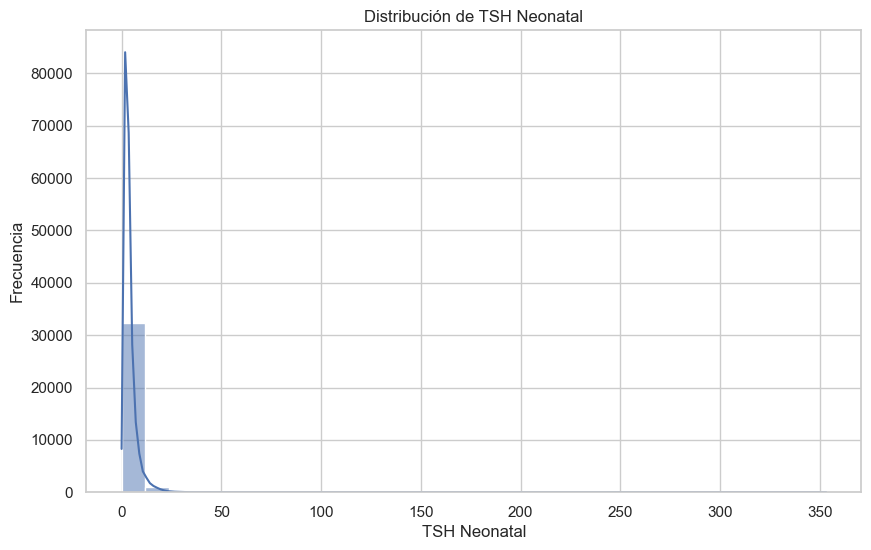

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['tsh_neonatal'], kde=True, bins=30)
plt.title('Distribución de TSH Neonatal')
plt.xlabel('TSH Neonatal')
plt.ylabel('Frecuencia')
plt.show()

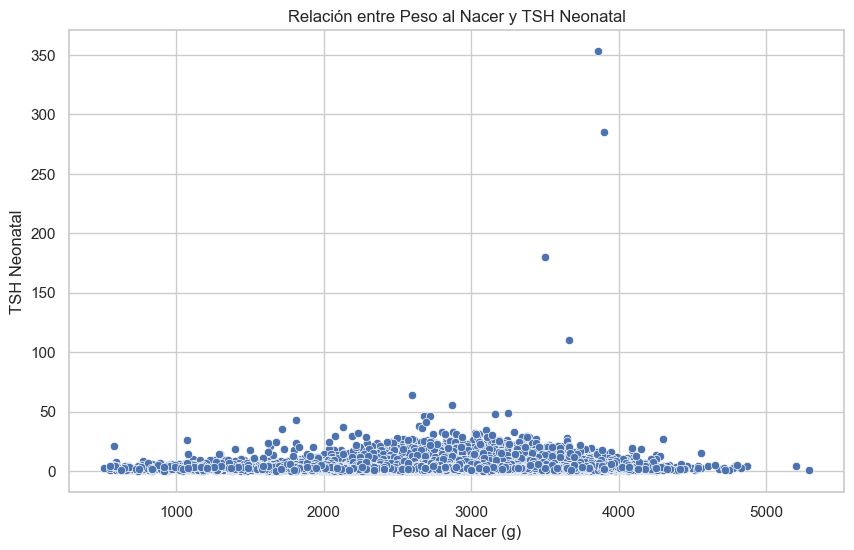

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='peso', y='tsh_neonatal', data=df)
plt.title('Relación entre Peso al Nacer y TSH Neonatal')
plt.xlabel('Peso al Nacer (g)')
plt.ylabel('TSH Neonatal')
plt.show()

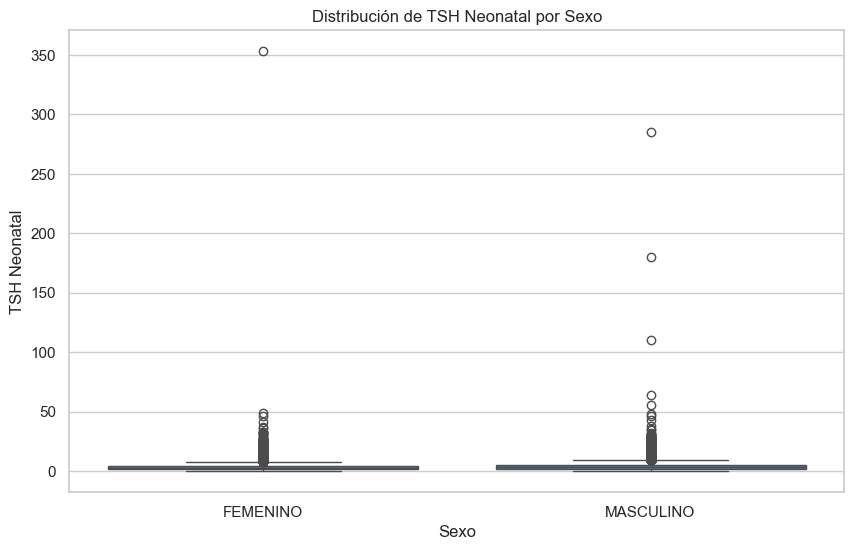

In [10]:
# Distribución de TSH Neonatal por Sexo
plt.figure(figsize=(10, 6))
sns.boxplot(x='sexo', y='tsh_neonatal', data=df)
plt.title('Distribución de TSH Neonatal por Sexo')
plt.xlabel('Sexo')
plt.ylabel('TSH Neonatal')
plt.show()

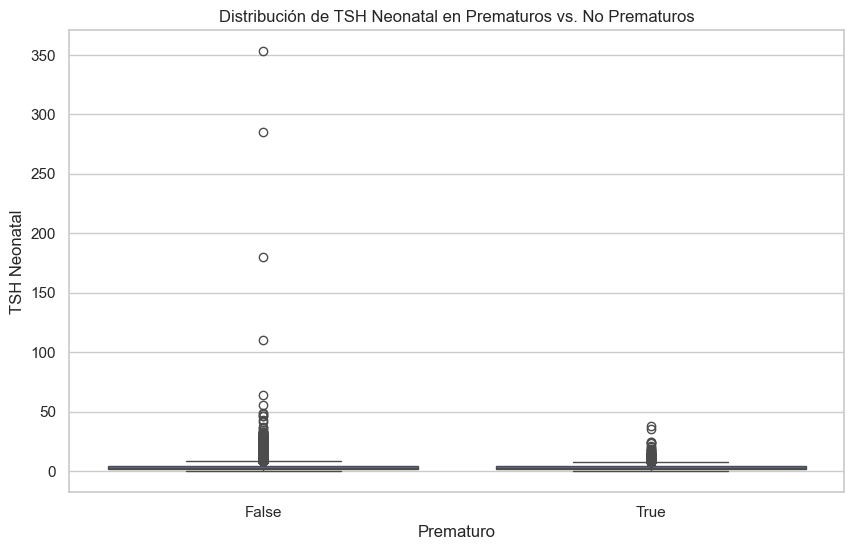

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='prematuro', y='tsh_neonatal', data=df)
plt.title('Distribución de TSH Neonatal en Prematuros vs. No Prematuros')
plt.xlabel('Prematuro')
plt.ylabel('TSH Neonatal')
plt.show()

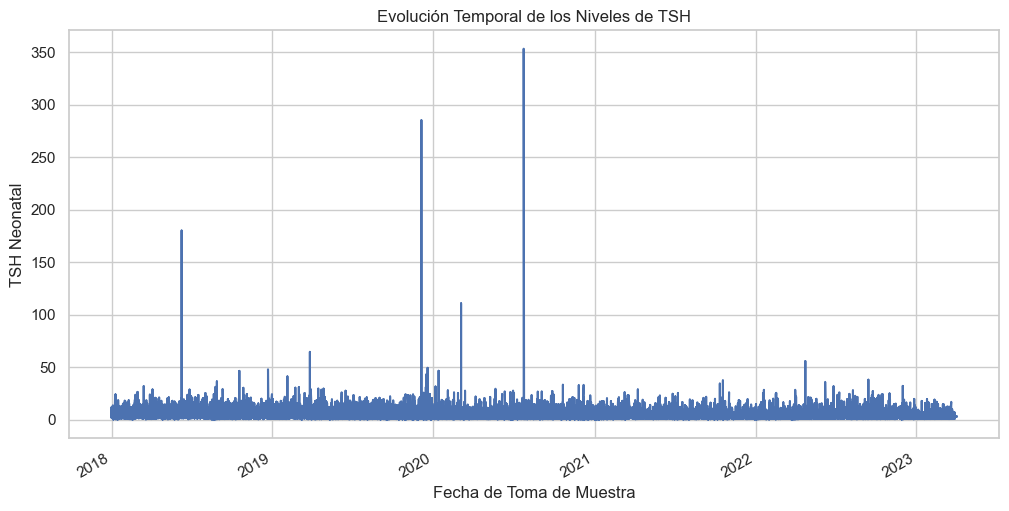

In [12]:
plt.figure(figsize=(12, 6))
df.set_index('fecha_toma_muestra')['tsh_neonatal'].plot()
plt.title('Evolución Temporal de los Niveles de TSH')
plt.xlabel('Fecha de Toma de Muestra')
plt.ylabel('TSH Neonatal')
plt.show()

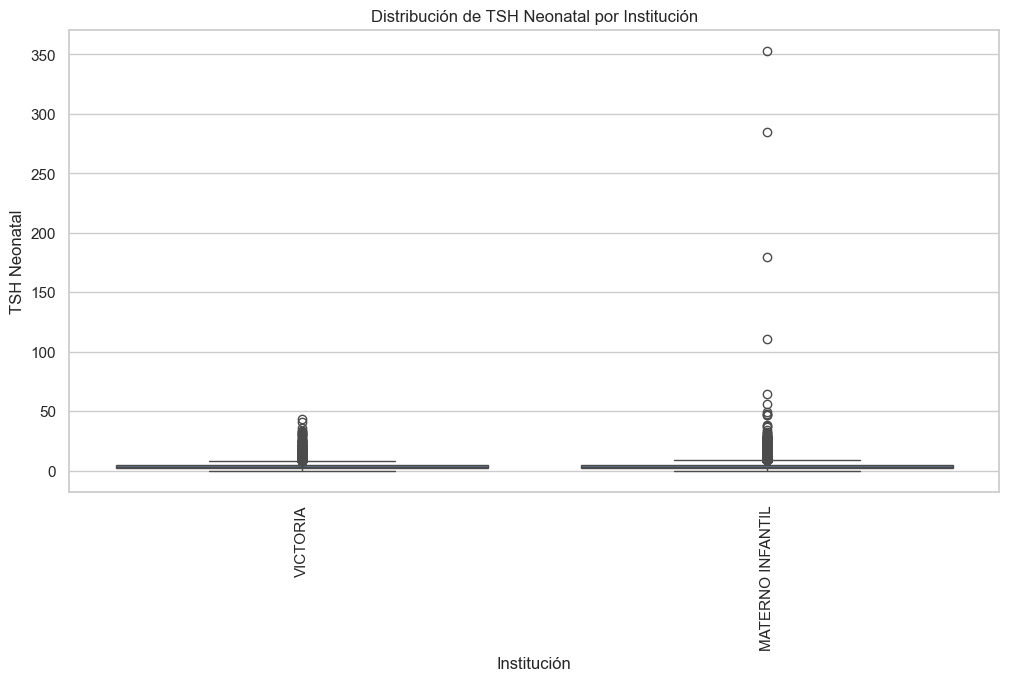

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='institucion', y='tsh_neonatal', data=df)
plt.title('Distribución de TSH Neonatal por Institución')
plt.xlabel('Institución')
plt.ylabel('TSH Neonatal')
plt.xticks(rotation=90)
plt.show()

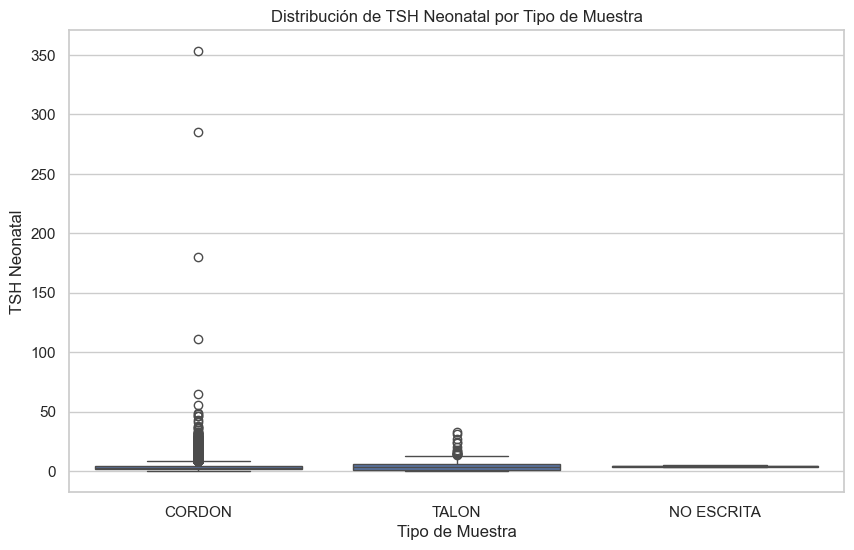

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='tipo_muestra', y='tsh_neonatal', data=df)
plt.title('Distribución de TSH Neonatal por Tipo de Muestra')
plt.xlabel('Tipo de Muestra')
plt.ylabel('TSH Neonatal')
plt.show()

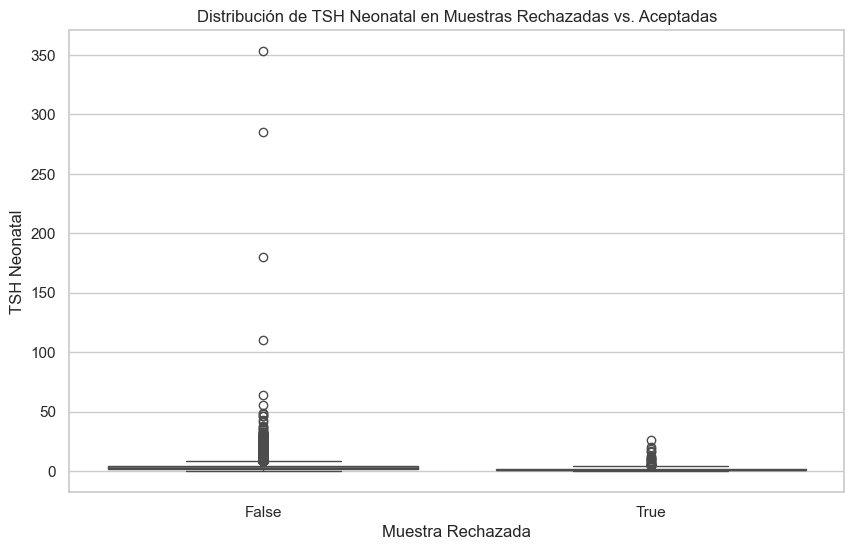

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='muestra_rechazada', y='tsh_neonatal', data=df)
plt.title('Distribución de TSH Neonatal en Muestras Rechazadas vs. Aceptadas')
plt.xlabel('Muestra Rechazada')
plt.ylabel('TSH Neonatal')
plt.show()

In [16]:
# Crear una copia del DataFrame con las columnas relevantes
columnas_relevantes = ['tsh_neonatal', 'peso', 'sexo']
df_relevante = df[columnas_relevantes].copy()

# Codificar la columna 'sexo' sin eliminar la primera categoría
df_relevante = pd.get_dummies(df_relevante, columns=['sexo'], drop_first=False)

# Verificar el DataFrame después de la codificación
print("\nDataFrame después de codificar 'sexo' (sin drop_first):")
print(df_relevante.head())


DataFrame después de codificar 'sexo' (sin drop_first):
   tsh_neonatal  peso  sexo_FEMENINO  sexo_MASCULINO
0           7.2  2890           True           False
1           4.7  3185          False            True
2           6.9  2855           True           False
3           3.1  3040           True           False
4           2.6  2565           True           False


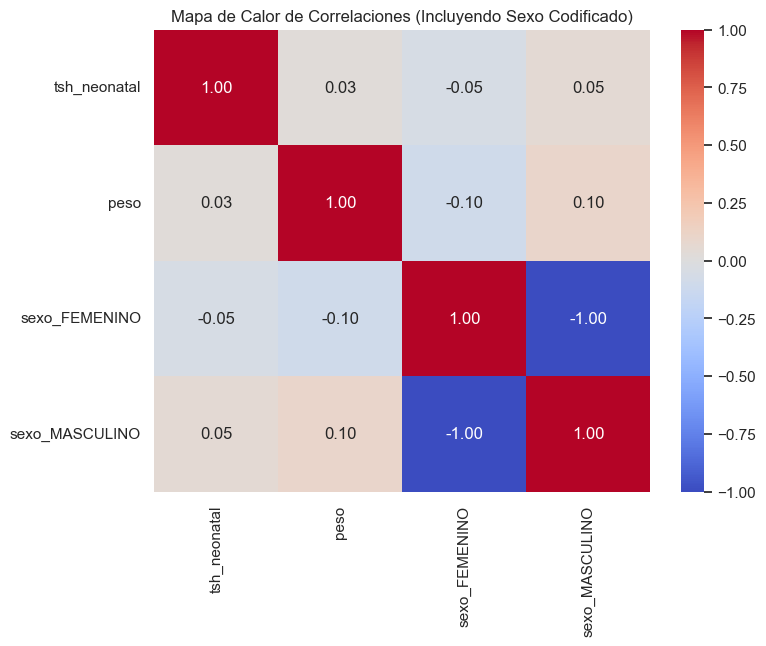

In [17]:

# Calcular la matriz de correlación
corr_matrix = df_relevante.corr()

# Graficar el mapa de calor de correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlaciones (Incluyendo Sexo Codificado)')
plt.show()

## Primera Muestra

In [18]:
# Filtrar pacientes con niveles de TSH neonatal >= 15 (primera muestra)
pacientes_hipotiroidismo1 = df[df["tsh_neonatal"] >= 15]

num_casos = pacientes_hipotiroidismo1.shape[0]
print(f"Número de casos de hipotiroidismo congénito: {num_casos}")

# Mostrar los pacientes con hipotiroidismo congénito
print("Pacientes con hipotiroidismo congénito (TSH >= 15) en primera muestra:")
pacientes_hipotiroidismo1[["id", "tsh_neonatal", "fecha_toma_muestra", "fecha_resultado"]]

Número de casos de hipotiroidismo congénito: 572
Pacientes con hipotiroidismo congénito (TSH >= 15) en primera muestra:


,id,tsh_neonatal,fecha_toma_muestra,fecha_resultado
47,363939,19.5,2019-04-18,2019-04-22
66,363957,16.6,2019-04-19,2019-04-22
80,363981,16.9,2019-04-20,2019-04-22
105,364098,18.9,2019-04-20,2019-04-22
124,364117,28.6,2019-04-22,2019-04-25
...,...,...,...,...
33376,362410,21.9,2019-03-28,2019-03-28
33403,362462,20.6,2019-03-28,2019-04-01
33433,362588,29.1,2019-03-29,2019-04-01
33549,363097,15.6,2019-04-07,2019-04-08


In [19]:
print("Estadísticas descriptivas de TSH neonatal:")
pacientes_hipotiroidismo1["tsh_neonatal"].describe()

Estadísticas descriptivas de TSH neonatal:


count    572.000000
mean      21.154545
std       20.125354
min       15.000000
25%       16.300000
50%       18.000000
75%       21.000000
max      353.100000
Name: tsh_neonatal, dtype: float64

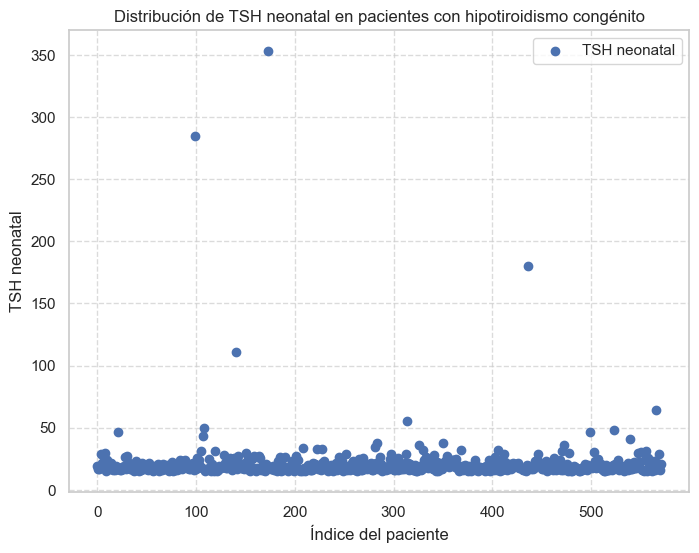

In [20]:
# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
plt.scatter(range(len(pacientes_hipotiroidismo1["tsh_neonatal"])), pacientes_hipotiroidismo1["tsh_neonatal"], label='TSH neonatal')

# Personalizar el gráfico
plt.title("Distribución de TSH neonatal en pacientes con hipotiroidismo congénito")
plt.xlabel("Índice del paciente")
plt.ylabel("TSH neonatal")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

## Segunda muestra

In [21]:
# Filtrar pacientes con tsh_neonatal >= 15
#pacientes_hipotiroidismo1 = df[df["tsh_neonatal"] >= 15]

# Filtrar pacientes que cumplen con el criterio de la segunda muestra
pacientes_hipotiroidismo_final = pacientes_hipotiroidismo1[
    (pacientes_hipotiroidismo1["resultado_muestra_2"] >= 15) | 
    (pacientes_hipotiroidismo1["resultado_muestra_2"] == 0)
]

# Mostrar el número de pacientes positivos
# 6 + 32
print(f"Número de pacientes con hipotiroidismo congénito: {len(pacientes_hipotiroidismo_final)}")

# Mostrar las primeras filas de los pacientes positivos
pacientes_hipotiroidismo_final.head()

Número de pacientes con hipotiroidismo congénito: 38


,id,ficha_id,fecha_ingreso,institucion,ars,historia_clinica,tipo_documento,numero_documento,ciudad,departamento,...,fecha_resultado_muestra_2,resultado_muestra_2,contador,muestra_rechazada,fecha_toma_rechazada,tipo_vinculacion,resultado_rechazada,fecha_resultado_rechazada,dias_pasados,dias_pasados2
1543,368895,373862,2019-07-04,MATERNO INFANTIL,VINCULADO,VEN003247,4,VEN003247,Bogota,Cundinamarca,...,NaT,0.0,1,False,NaT,NaN,NaN,NaT,1,NaN
2368,371804,376807,2019-08-20,MATERNO INFANTIL,VINCULADO,VEN26430968,4,VEN24573470,Bogota,Cundinamarca,...,NaT,0.0,1,False,NaT,NaN,NaN,NaT,2,NaN
2848,373388,378401,2019-09-10,MATERNO INFANTIL,VINCULADO,956516128061995,4,956516128061995,Bogota,Cundinamarca,...,NaT,0.0,1,False,NaT,NaN,NaN,NaT,2,NaN
3681,376283,381314,2019-10-21,MATERNO INFANTIL,UNICAJAS-CONFACUNDI,1002800225,1,1002800225,Bogota,Cundinamarca,...,NaT,0.0,1,False,NaT,NaN,NaN,NaT,1,NaN
4313,378461,383510,2019-11-22,MATERNO INFANTIL,CAPITAL SALUD,1193521724,1,1193521724,Bogota,Cundinamarca,...,2020-03-18,0.0,1,False,NaT,NaN,NaN,NaT,2,113.0


In [22]:
# Contar pacientes con resultado_muestra_2 == 0
pacientes_sin_segunda_muestra = pacientes_hipotiroidismo_final[pacientes_hipotiroidismo_final["resultado_muestra_2"] == 0]
print(f"Número de pacientes sin segunda muestra: {len(pacientes_sin_segunda_muestra)}")

Número de pacientes sin segunda muestra: 32


In [23]:
pacientes_con_segunda_muestra = pacientes_hipotiroidismo1[pacientes_hipotiroidismo1["resultado_muestra_2"] >= 15]
print(f"Número de pacientes sin segunda muestra: {len(pacientes_con_segunda_muestra)}")

Número de pacientes sin segunda muestra: 6


In [24]:
pacientes_hipotiroidismo_final.describe(include=['int', 'float'])

,id,ficha_id,tipo_documento,telefono_1,telefono_2,peso,tsh_neonatal,ficha_id_2,resultado_muestra_2,contador,resultado_rechazada,dias_pasados,dias_pasados2
count,38.000000,38.000000,38.000000,3.800000e+01,3.800000e+01,38.000000,38.000000,38.000000,38.000000,38.0,0.0,38.000000,7.000000
mean,383819.236842,388865.131579,2.684211,2.332245e+09,8.496933e+07,2914.210526,44.234211,71810.315789,12.363158,1.0,NaN,2.526316,18.714286
std,28233.148325,28404.332260,1.832223,1.413779e+09,5.237861e+08,533.060422,73.059407,153649.339508,33.961030,0.0,NaN,1.246332,41.588116
min,332390.000000,337075.000000,1.000000,0.000000e+00,0.000000e+00,1500.000000,15.100000,0.000000,0.000000,1.0,NaN,1.000000,1.000000
25%,357667.250000,362529.250000,1.000000,7.513646e+08,0.000000e+00,2641.250000,17.100000,0.000000,0.000000,1.0,NaN,2.000000,3.000000
50%,380610.500000,385687.500000,1.500000,3.125174e+09,0.000000e+00,2925.000000,17.800000,0.000000,0.000000,1.0,NaN,2.000000,3.000000
75%,402069.250000,407268.250000,5.000000,3.214881e+09,0.000000e+00,3270.000000,24.175000,0.000000,0.000000,1.0,NaN,3.000000,4.000000
max,436450.000000,441783.000000,5.000000,3.239559e+09,3.228835e+09,3900.000000,353.100000,438384.000000,129.400000,1.0,NaN,6.000000,113.000000


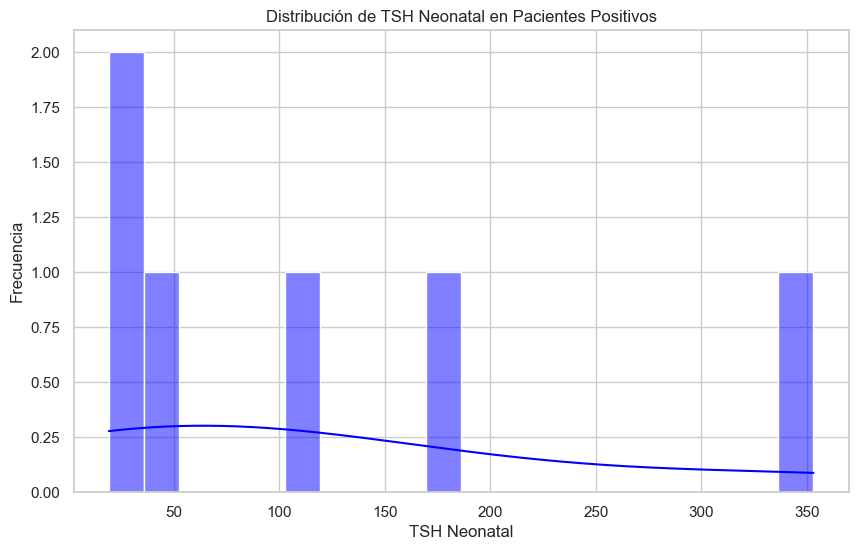

In [25]:
# Histograma de TSH Neonatal
plt.figure(figsize=(10, 6))
sns.histplot(pacientes_con_segunda_muestra["tsh_neonatal"], bins=20, kde=True, color='blue')
plt.title('Distribución de TSH Neonatal en Pacientes Positivos')
plt.xlabel('TSH Neonatal')
plt.ylabel('Frecuencia')
plt.show()

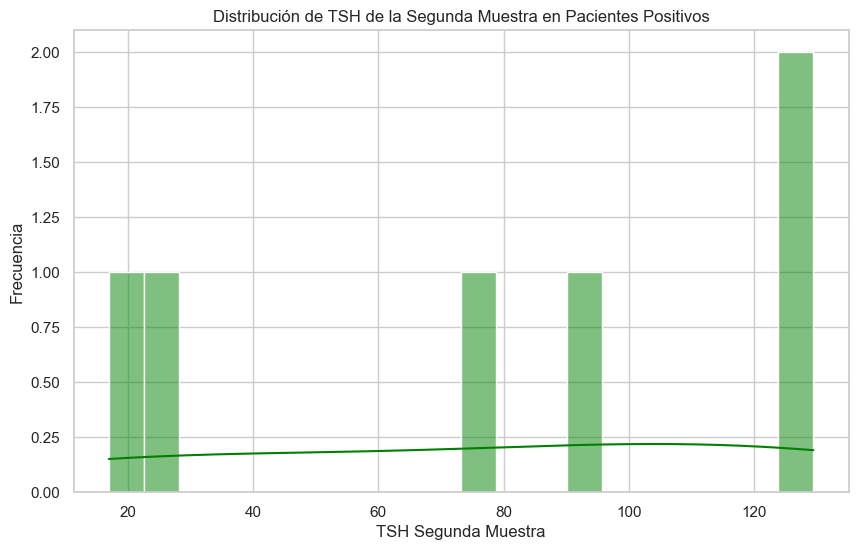

In [29]:
# Histograma de TSH de la segunda muestra
plt.figure(figsize=(10, 6))
sns.histplot(pacientes_con_segunda_muestra["resultado_muestra_2"], bins=20, kde=True, color='green')
plt.title('Distribución de TSH de la Segunda Muestra en Pacientes Positivos')
plt.xlabel('TSH Segunda Muestra')
plt.ylabel('Frecuencia')
plt.show()

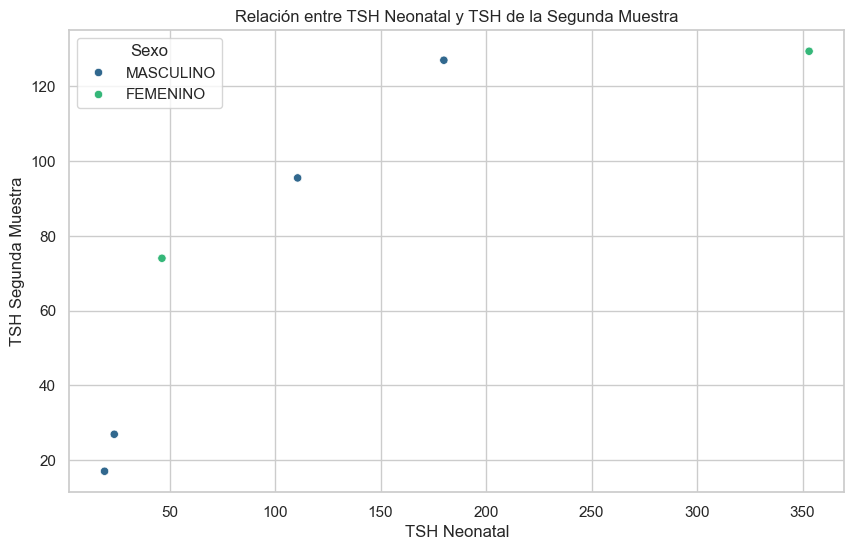

In [30]:
# Gráfico de dispersión (scatter plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tsh_neonatal', y='resultado_muestra_2', data=pacientes_con_segunda_muestra, hue='sexo', palette='viridis')
plt.title('Relación entre TSH Neonatal y TSH de la Segunda Muestra')
plt.xlabel('TSH Neonatal')
plt.ylabel('TSH Segunda Muestra')
plt.legend(title='Sexo')
plt.show()

C:\Users\Aunak\AppData\Local\Temp\ipykernel_3820\2564171878.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sexo', data=pacientes_con_segunda_muestra, palette='pastel')


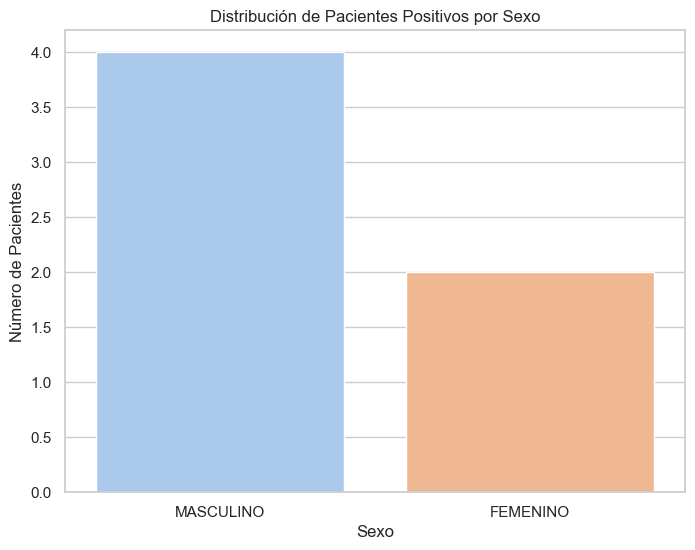

In [31]:
# Gráfico de barras (distribución por sexo)
plt.figure(figsize=(8, 6))
sns.countplot(x='sexo', data=pacientes_con_segunda_muestra, palette='pastel')
plt.title('Distribución de Pacientes Positivos por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Número de Pacientes')
plt.show()

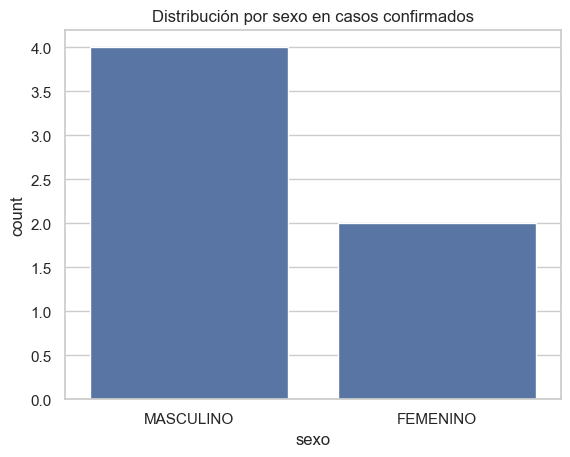

In [28]:
# Gráfico de barras para sexo
sns.countplot(x='sexo', data=pacientes_con_segunda_muestra)
plt.title('Distribución por sexo en casos confirmados')
plt.show()

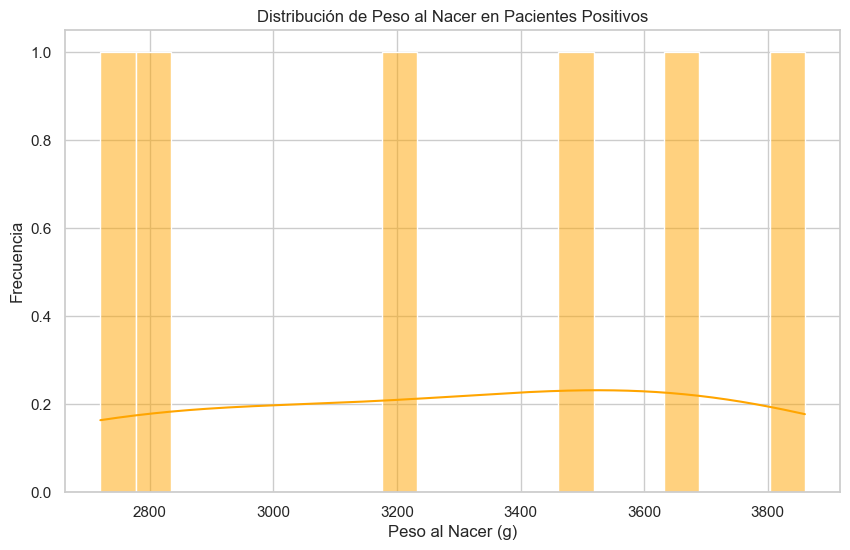

In [34]:
# Histograma de peso al nacer
plt.figure(figsize=(10, 6))
sns.histplot(pacientes_con_segunda_muestra["peso"], bins=20, kde=True, color='orange')
plt.title('Distribución de Peso al Nacer en Pacientes Positivos')
plt.xlabel('Peso al Nacer (g)')
plt.ylabel('Frecuencia')
plt.show()

C:\Users\Aunak\AppData\Local\Temp\ipykernel_3820\2644047994.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sexo', y='tsh_neonatal', data=pacientes_con_segunda_muestra, palette='pastel')


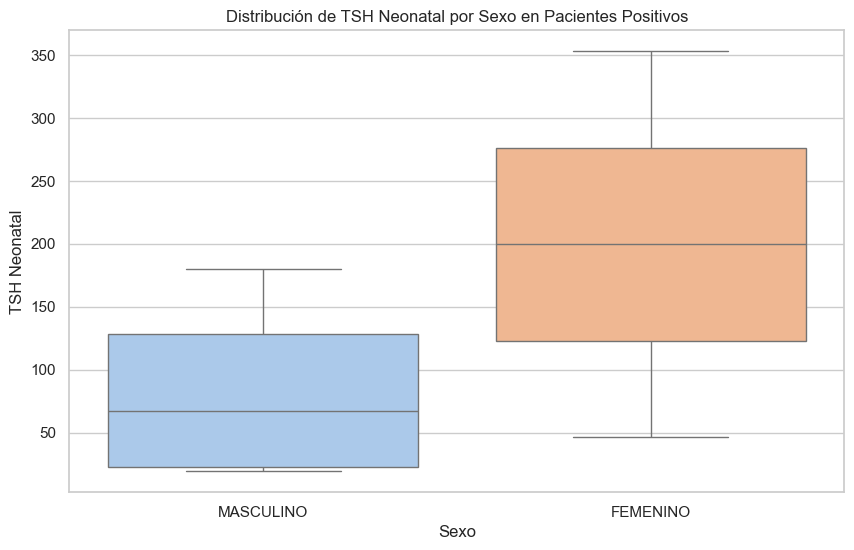

In [36]:
# Boxplot de TSH Neonatal por sexo
plt.figure(figsize=(10, 6))
sns.boxplot(x='sexo', y='tsh_neonatal', data=pacientes_con_segunda_muestra, palette='pastel')
plt.title('Distribución de TSH Neonatal por Sexo en Pacientes Positivos')
plt.xlabel('Sexo')
plt.ylabel('TSH Neonatal')
plt.show()

C:\Users\Aunak\AppData\Local\Temp\ipykernel_3820\127120345.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sexo', y='resultado_muestra_2', data=pacientes_con_segunda_muestra, palette='pastel')


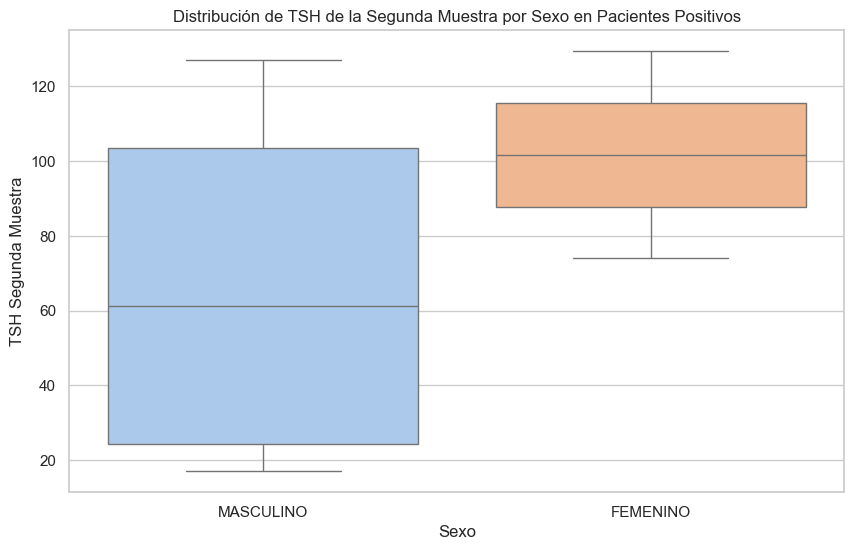

In [37]:
# Boxplot de TSH de la segunda muestra por sexo
plt.figure(figsize=(10, 6))
sns.boxplot(x='sexo', y='resultado_muestra_2', data=pacientes_con_segunda_muestra, palette='pastel')
plt.title('Distribución de TSH de la Segunda Muestra por Sexo en Pacientes Positivos')
plt.xlabel('Sexo')
plt.ylabel('TSH Segunda Muestra')
plt.show()

C:\Users\Aunak\AppData\Local\Temp\ipykernel_3820\2349880843.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='prematuro', data=pacientes_con_segunda_muestra, palette='Set2')


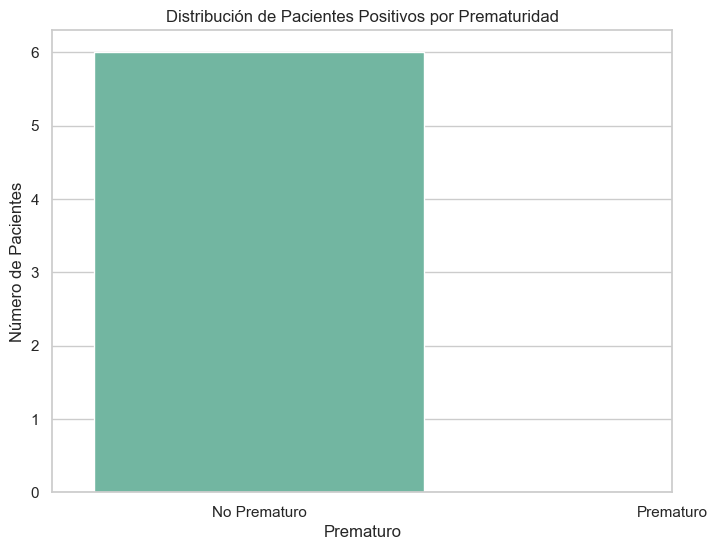

In [38]:
# Gráfico de barras (distribución por prematuridad)
plt.figure(figsize=(8, 6))
sns.countplot(x='prematuro', data=pacientes_con_segunda_muestra, palette='Set2')
plt.title('Distribución de Pacientes Positivos por Prematuridad')
plt.xlabel('Prematuro')
plt.ylabel('Número de Pacientes')
plt.xticks(ticks=[0, 1], labels=['No Prematuro', 'Prematuro'])
plt.show()

C:\Users\Aunak\AppData\Local\Temp\ipykernel_3820\3952616914.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  casos_por_fecha = pacientes_con_segunda_muestra.resample('M', on='fecha_toma_muestra').size()


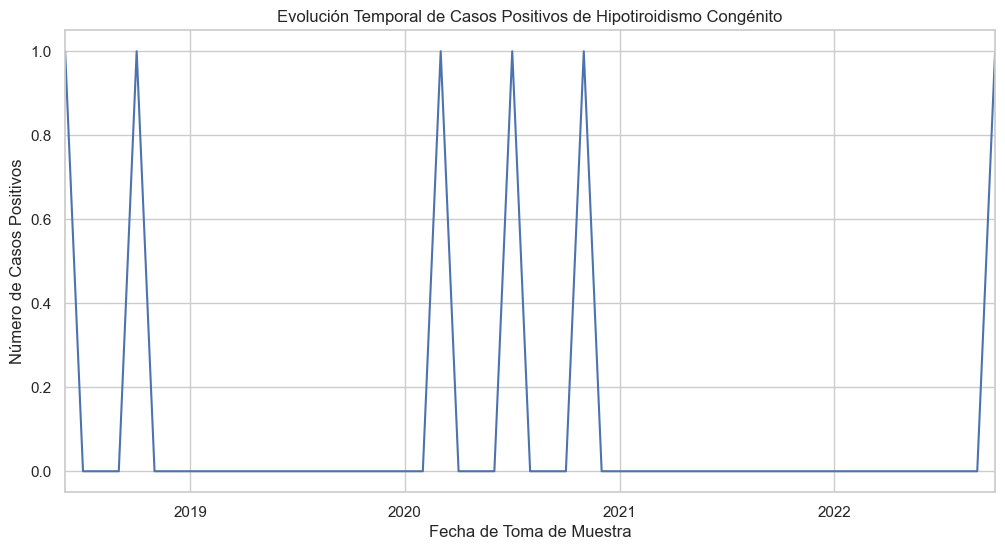

In [39]:
# Convertir la columna de fecha a tipo datetime (si no lo está ya)
pacientes_con_segunda_muestra['fecha_toma_muestra'] = pd.to_datetime(pacientes_con_segunda_muestra['fecha_toma_muestra'])

# Agrupar por fecha y contar el número de casos
casos_por_fecha = pacientes_con_segunda_muestra.resample('M', on='fecha_toma_muestra').size()

# Gráfico de línea (evolución temporal)
plt.figure(figsize=(12, 6))
casos_por_fecha.plot()
plt.title('Evolución Temporal de Casos Positivos de Hipotiroidismo Congénito')
plt.xlabel('Fecha de Toma de Muestra')
plt.ylabel('Número de Casos Positivos')
plt.grid(True)
plt.show()

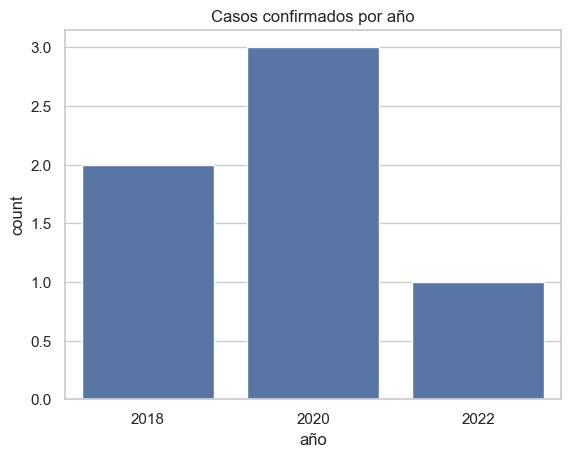

In [41]:
pacientes_con_segunda_muestra['año'] = pacientes_con_segunda_muestra['fecha_toma_muestra'].dt.year
sns.countplot(x='año', data=pacientes_con_segunda_muestra)
plt.title('Casos confirmados por año')
plt.show()

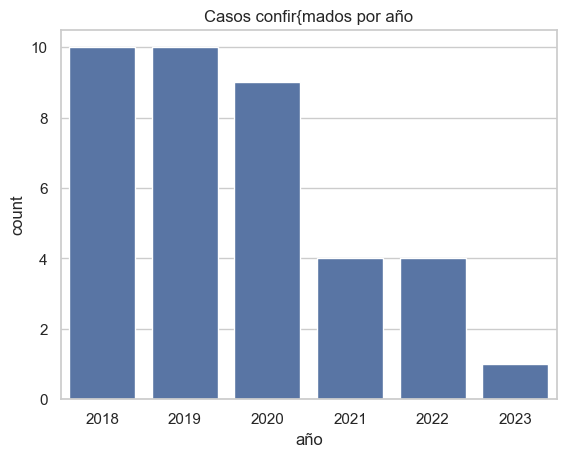

In [27]:
pacientes_hipotiroidismo_final['año'] = pacientes_hipotiroidismo_final['fecha_toma_muestra'].dt.year
sns.countplot(x='año', data=pacientes_hipotiroidismo_final)
plt.title('Casos confir{mados por año')
plt.show()